In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import os


# Importing dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


In [2]:
# Load the data
data = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
data.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

# Exploring the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Filter out rows with 'Year' values beyond 2015 as they are likely to be erroneous or irrelevant for the analysis
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

# Fields and data types 🗒️:
* Rank - Ranking of overall sales, integer
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.), object
* Year - Year of the game's release, float
* Genre - Genre of the game ,object
* Publisher - Publisher of the game, object
* NA_Sales - Sales in North America (in millions), float
* EU_Sales - Sales in Europe (in millions), float
* JP_Sales - Sales in Japan (in millions), float
* Other_Sales - Sales in the rest of the world (in millions), float
* Global_Sales - Total worldwide sales, float

# My analysis:
## Interesting dataset, both the year and the publisher have missing data.

In [5]:
# Display the dimensions of the dataset
data.shape

(16250, 11)

In [6]:
data.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16250.000000  15979.000000  16250.000000  16250.000000  16250.000000   
mean    8233.153785   2006.197071      0.268924      0.148146      0.078601   
std     4775.382512      5.714810      0.824467      0.509035      0.312196   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4095.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8213.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12340.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2015.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16250.000000  16250.000000  
mean       0.048614      0.544564  
std        0.190271      1.569213  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [7]:
# Count the occurrences of each platform in the dataset
data.Platform.value_counts()

Platform
DS      2162
PS2     2161
Wii     1325
PS3     1297
X360    1257
PSP     1213
PS      1196
PC       922
XB       824
GBA      822
GC       556
3DS      474
PSV      351
N64      319
SNES     239
PS4      228
SAT      173
XOne     159
WiiU     133
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [8]:
# Count the occurrences of each genre in the dataset
data.Genre.value_counts()

Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

In [9]:
# Count the occurrences of each publisher in the dataset
data.Publisher.value_counts()

Publisher
Electronic Arts                 1331
Activision                       961
Ubisoft                          907
Namco Bandai Games               892
Konami Digital Entertainment     824
                                ... 
Answer Software                    1
Ecole                              1
Yumedia                            1
HAL Laboratory                     1
Rain Games                         1
Name: count, Length: 566, dtype: int64

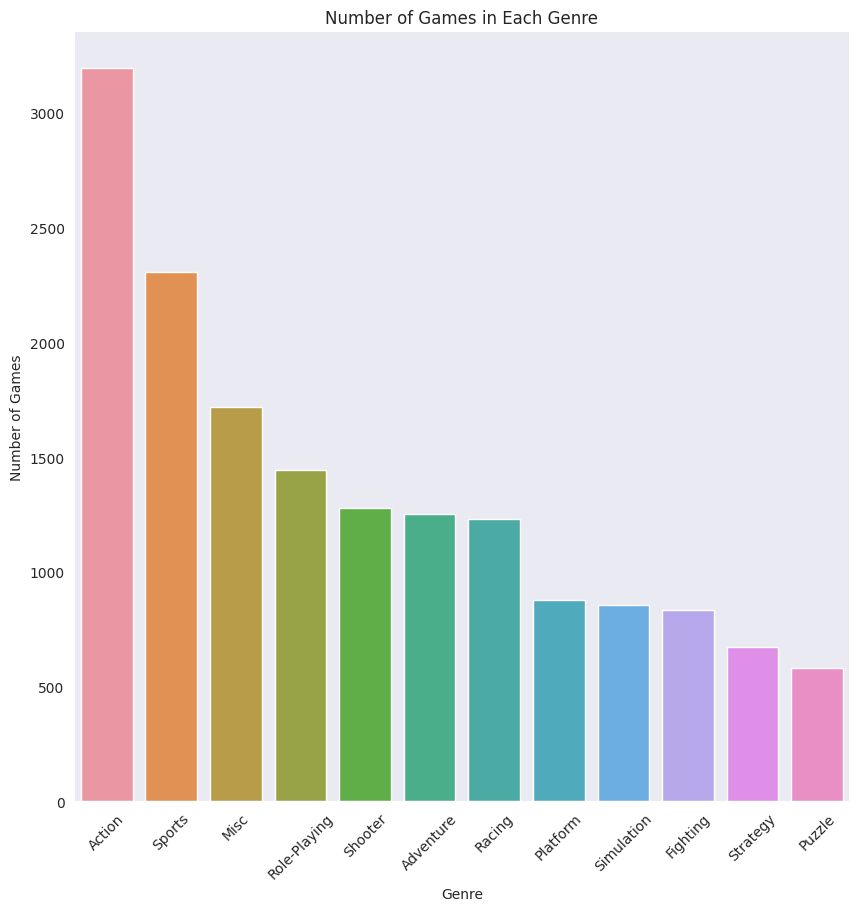

In [10]:
plt.figure(figsize=(10,10))
# Create a countplot of the data, ordering the bars by the count of games in each genre
sns.countplot(x="Genre", data=data, order=data['Genre'].value_counts().index)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Label the x and y axes
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games in Each Genre')
plt.show()

# Unexpected Insights:
### It's commonly known that action games are popular, but the high count of sports games is unexpected.
### Personally, I prefer survival games.

In [11]:
# Count the occurrences of each year in the dataset
data.Year.value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: count, dtype: int64

# Years with the highest number of game releases
### The period between 2007 and 2010 saw the largest number of game releases.
| Year  | Count |
|-------|-------|
| 2009.0| 1431  |
| 2008.0| 1428  |
| 2010.0| 1259  |
| 2007.0| 1202  |

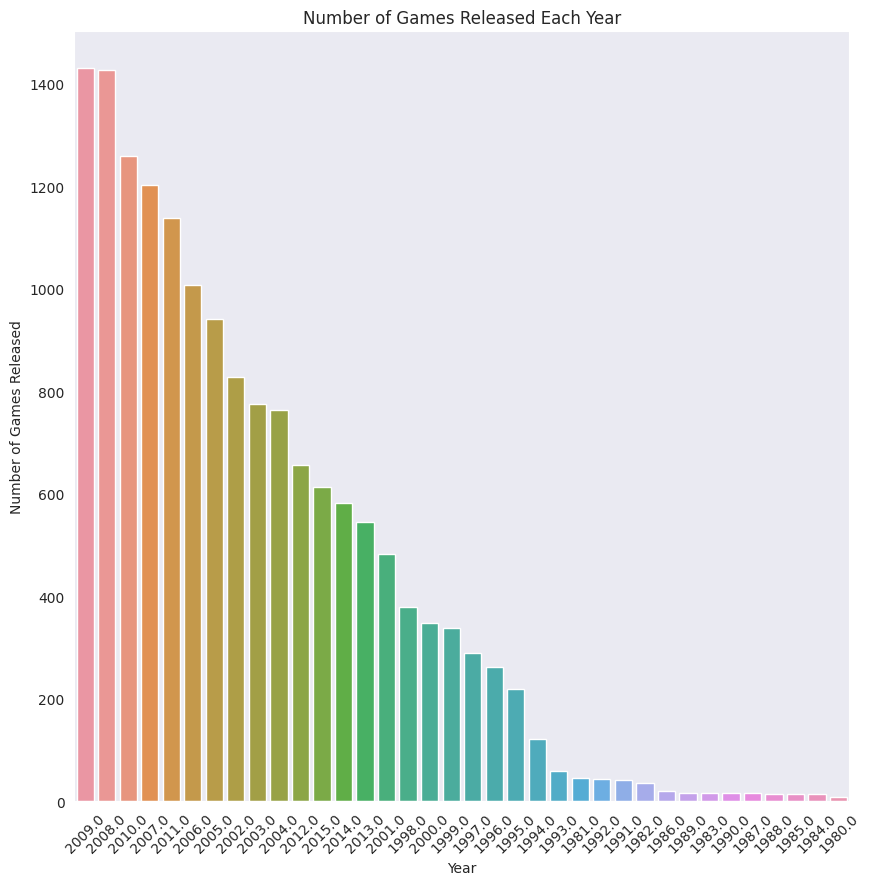

In [12]:
plt.figure(figsize=(10,10))
# Create a countplot of the data, ordering the bars by the count of games released in each year
sns.countplot(x="Year", data=data, order=data.groupby(['Year'])['Name'].count().sort_values(ascending=False).index)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released Each Year')
plt.show()

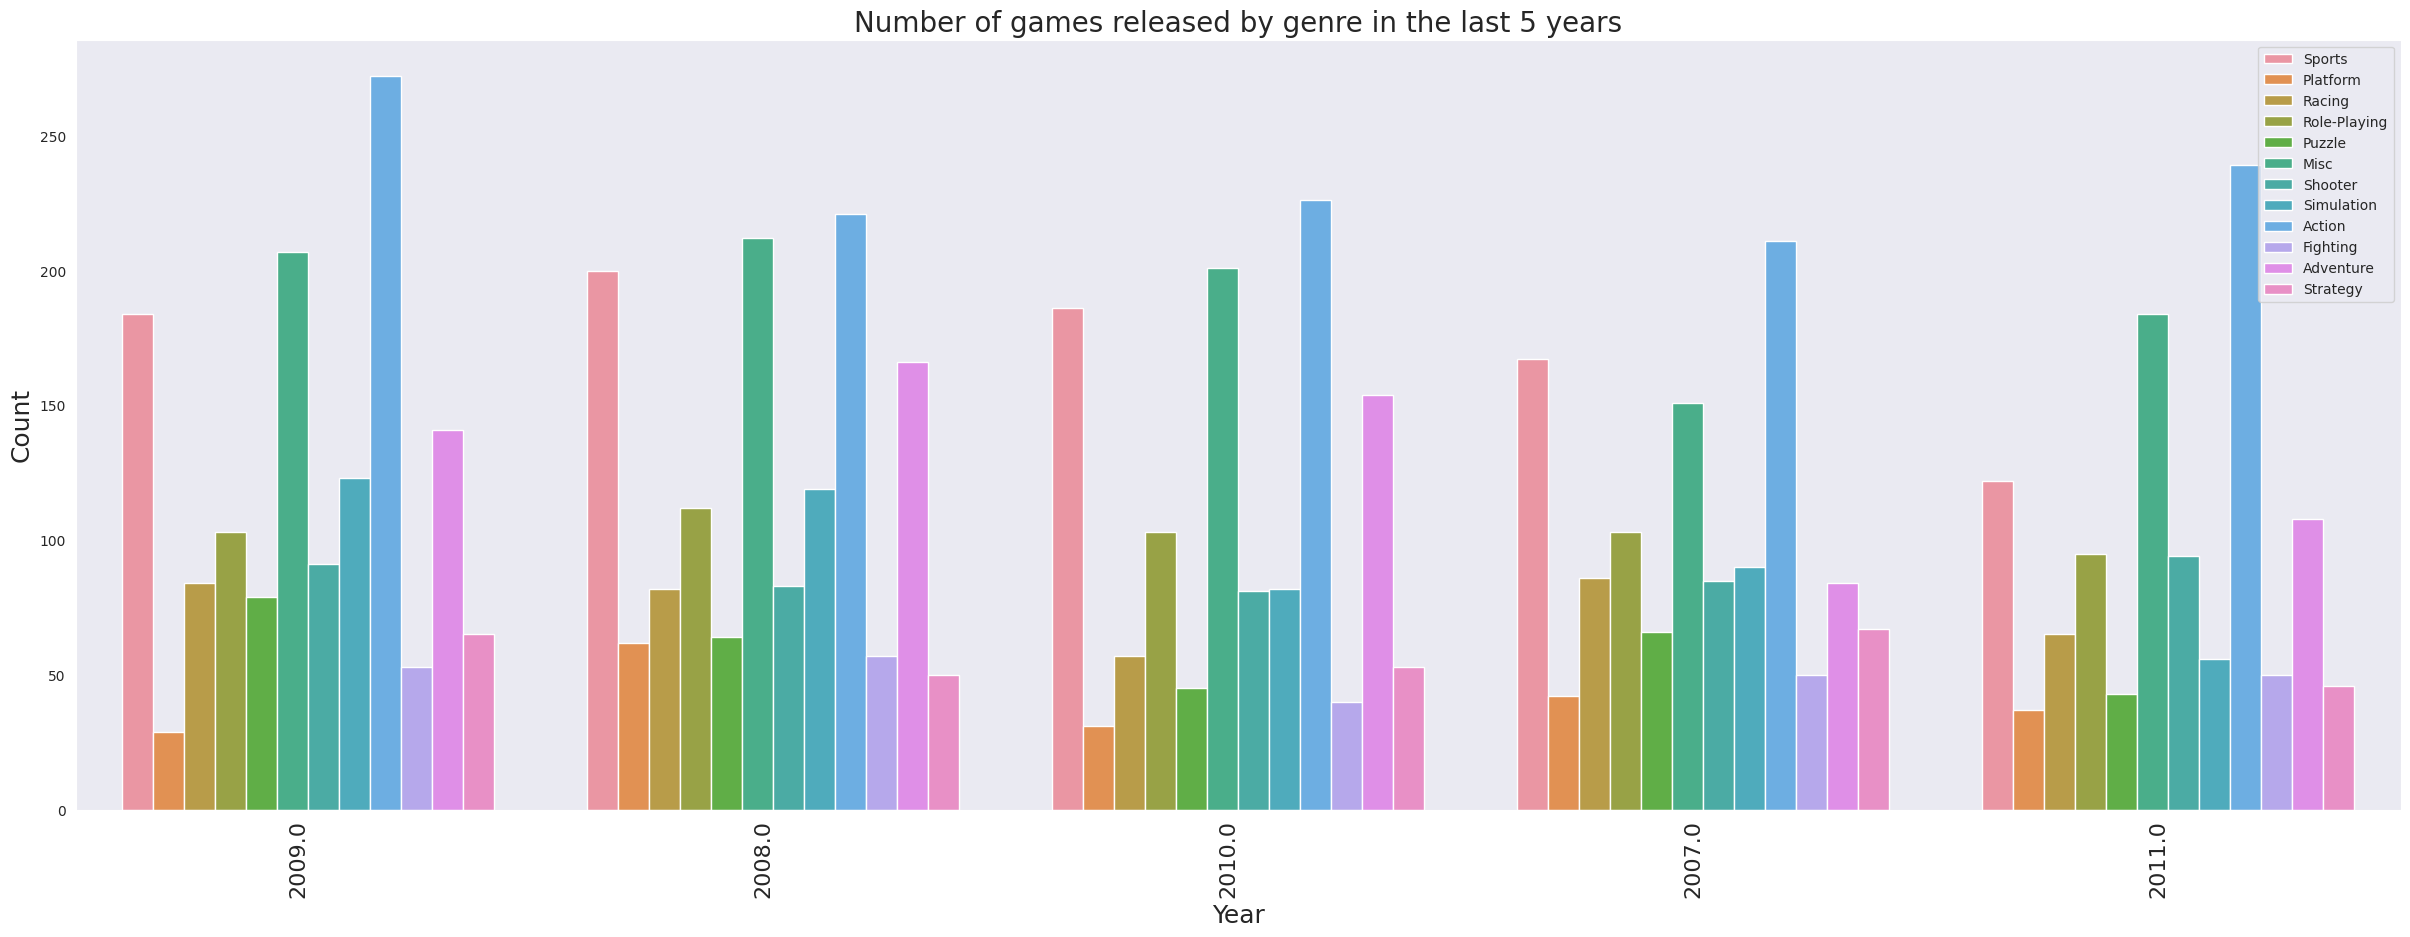

In [13]:
# Increase the size of the figure
plt.figure(figsize=(30, 10))
# Create a countplot of the data, with 'Year' on the x-axis, 'Genre' as hue, and ordering by the top 5 years
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
# Rotate and adjust the size of the x-axis labels for better readability
plt.xticks(size=16, rotation=90, ha='right')
# Label the x and y axes
plt.xlabel('Year', size=18)
plt.ylabel('Count', size=18)
# Set the title of the plot
plt.title('Number of games released by genre in the last 5 years', size=20)
# Adjust the legend location and size
plt.legend(loc='upper right', fontsize='medium')
# Display the plot
plt.show()

# Displaying the years with the highest global sales
|   Year  |  Global Sales  |
|---------|----------------|
| 2008.0  |     678.90     |
| 2009.0  |     667.30     |
| 2007.0  |     611.13     |
| 2010.0  |     600.45     |
| 2006.0  |     521.04     |

In [14]:
# Grouping the data by 'Year' and summing up the global sales
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()

# Resetting index to convert the series to a DataFrame
data_year = data_year.reset_index()

# Sorting the DataFrame by the 'Global_Sales' column in descending order
data_year = data_year.sort_values(by='Global_Sales', ascending=False)

# Printing the DataFrame without displaying the index
print(data_year.to_string(index=False))

  Year  Global_Sales
2008.0        678.90
2009.0        667.30
2007.0        611.13
2010.0        600.45
2006.0        521.04
2011.0        515.99
2005.0        459.94
2004.0        419.31
2002.0        395.52
2013.0        368.11
2012.0        363.54
2003.0        357.85
2014.0        337.05
2001.0        331.47
2015.0        264.44
1998.0        256.47
1999.0        251.27
2000.0        201.56
1997.0        200.98
1996.0        199.15
1995.0         88.11
1994.0         79.17
1992.0         76.16
1989.0         73.45
1985.0         53.94
1984.0         50.36
1990.0         49.39
1988.0         47.22
1993.0         45.98
1986.0         37.07
1981.0         35.77
1991.0         32.23
1982.0         28.86
1987.0         21.74
1983.0         16.79
1980.0         11.38


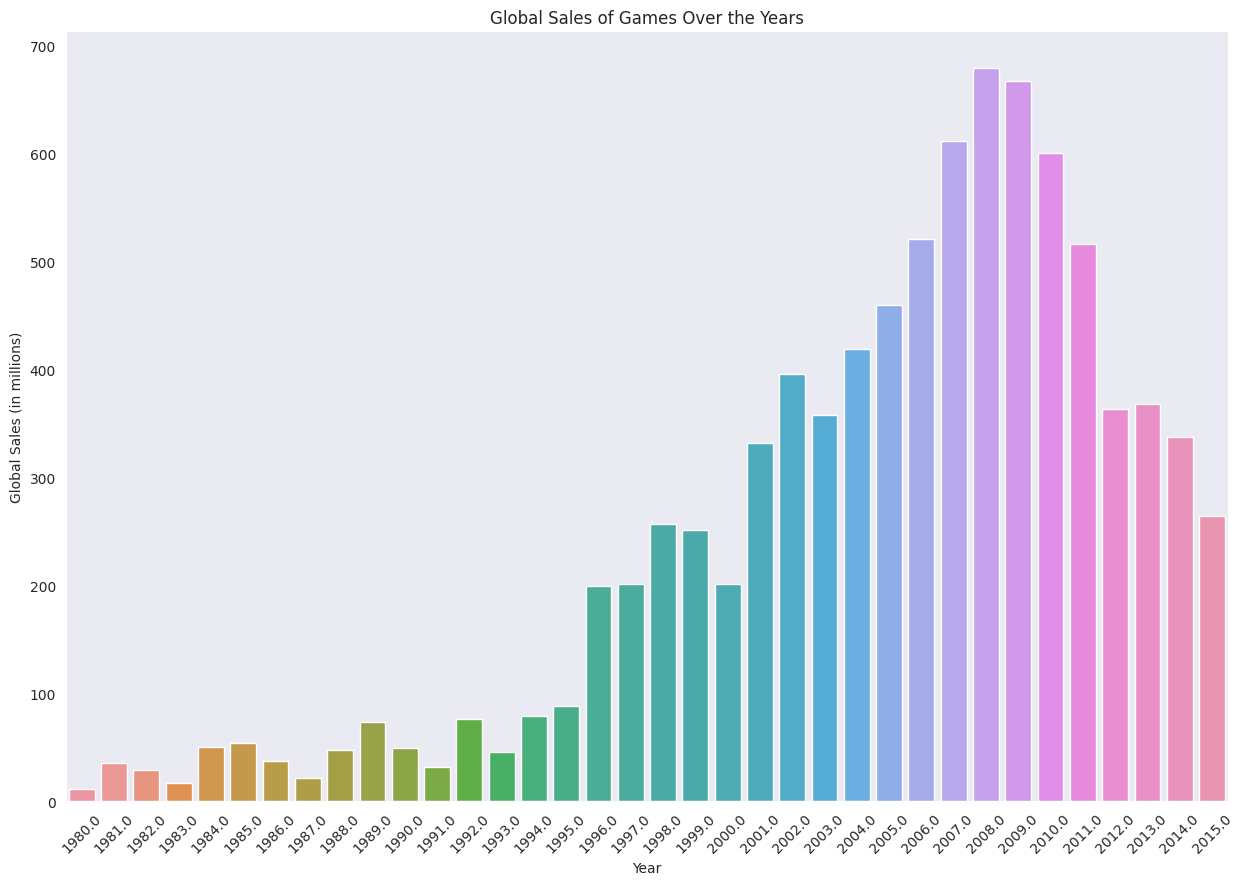

In [15]:
plt.figure(figsize=(15, 10))
# Create a bar plot of global sales over the years
sns.barplot(x="Year", y="Global_Sales", data=data_year)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales of Games Over the Years')
plt.show()

In [16]:
# Grouping by 'Year' and 'Genre', counting the occurrences, and resetting the index
year_genre_count = data.groupby(['Year', 'Genre']).size().reset_index(name='count')

# Finding the rows with the maximum count for each year
year_max_genre = year_genre_count.loc[year_genre_count.groupby('Year')['count'].idxmax()]

# Resetting the index
year_max_genre.reset_index(drop=True, inplace=True)

# Printing the DataFrame without displaying the index
print(year_max_genre.to_string(index=False))

  Year    Genre  count
1980.0     Misc      4
1981.0   Action     25
1982.0   Action     18
1983.0   Action      7
1984.0   Puzzle      3
1985.0 Platform      4
1986.0   Action      6
1987.0   Sports      4
1988.0 Platform      4
1989.0   Puzzle      5
1990.0   Action      3
1991.0   Sports      7
1992.0 Fighting      7
1993.0 Fighting     11
1994.0 Fighting     22
1995.0 Fighting     29
1996.0   Sports     52
1997.0   Sports     46
1998.0   Sports     70
1999.0   Sports     62
2000.0   Sports     81
2001.0   Sports     96
2002.0   Sports    188
2003.0   Action    144
2004.0   Action    125
2005.0   Action    192
2006.0   Action    184
2007.0   Action    211
2008.0   Action    221
2009.0   Action    272
2010.0   Action    226
2011.0   Action    239
2012.0   Action    266
2013.0   Action    148
2014.0   Action    186
2015.0   Action    255


In [17]:
# Extracting the values of the 'Genre' column from the DataFrame
genre = year_max_genre['Genre'].values
genre

array(['Misc', 'Action', 'Action', 'Action', 'Puzzle', 'Platform',
       'Action', 'Sports', 'Platform', 'Puzzle', 'Action', 'Sports',
       'Fighting', 'Fighting', 'Fighting', 'Fighting', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
      dtype=object)

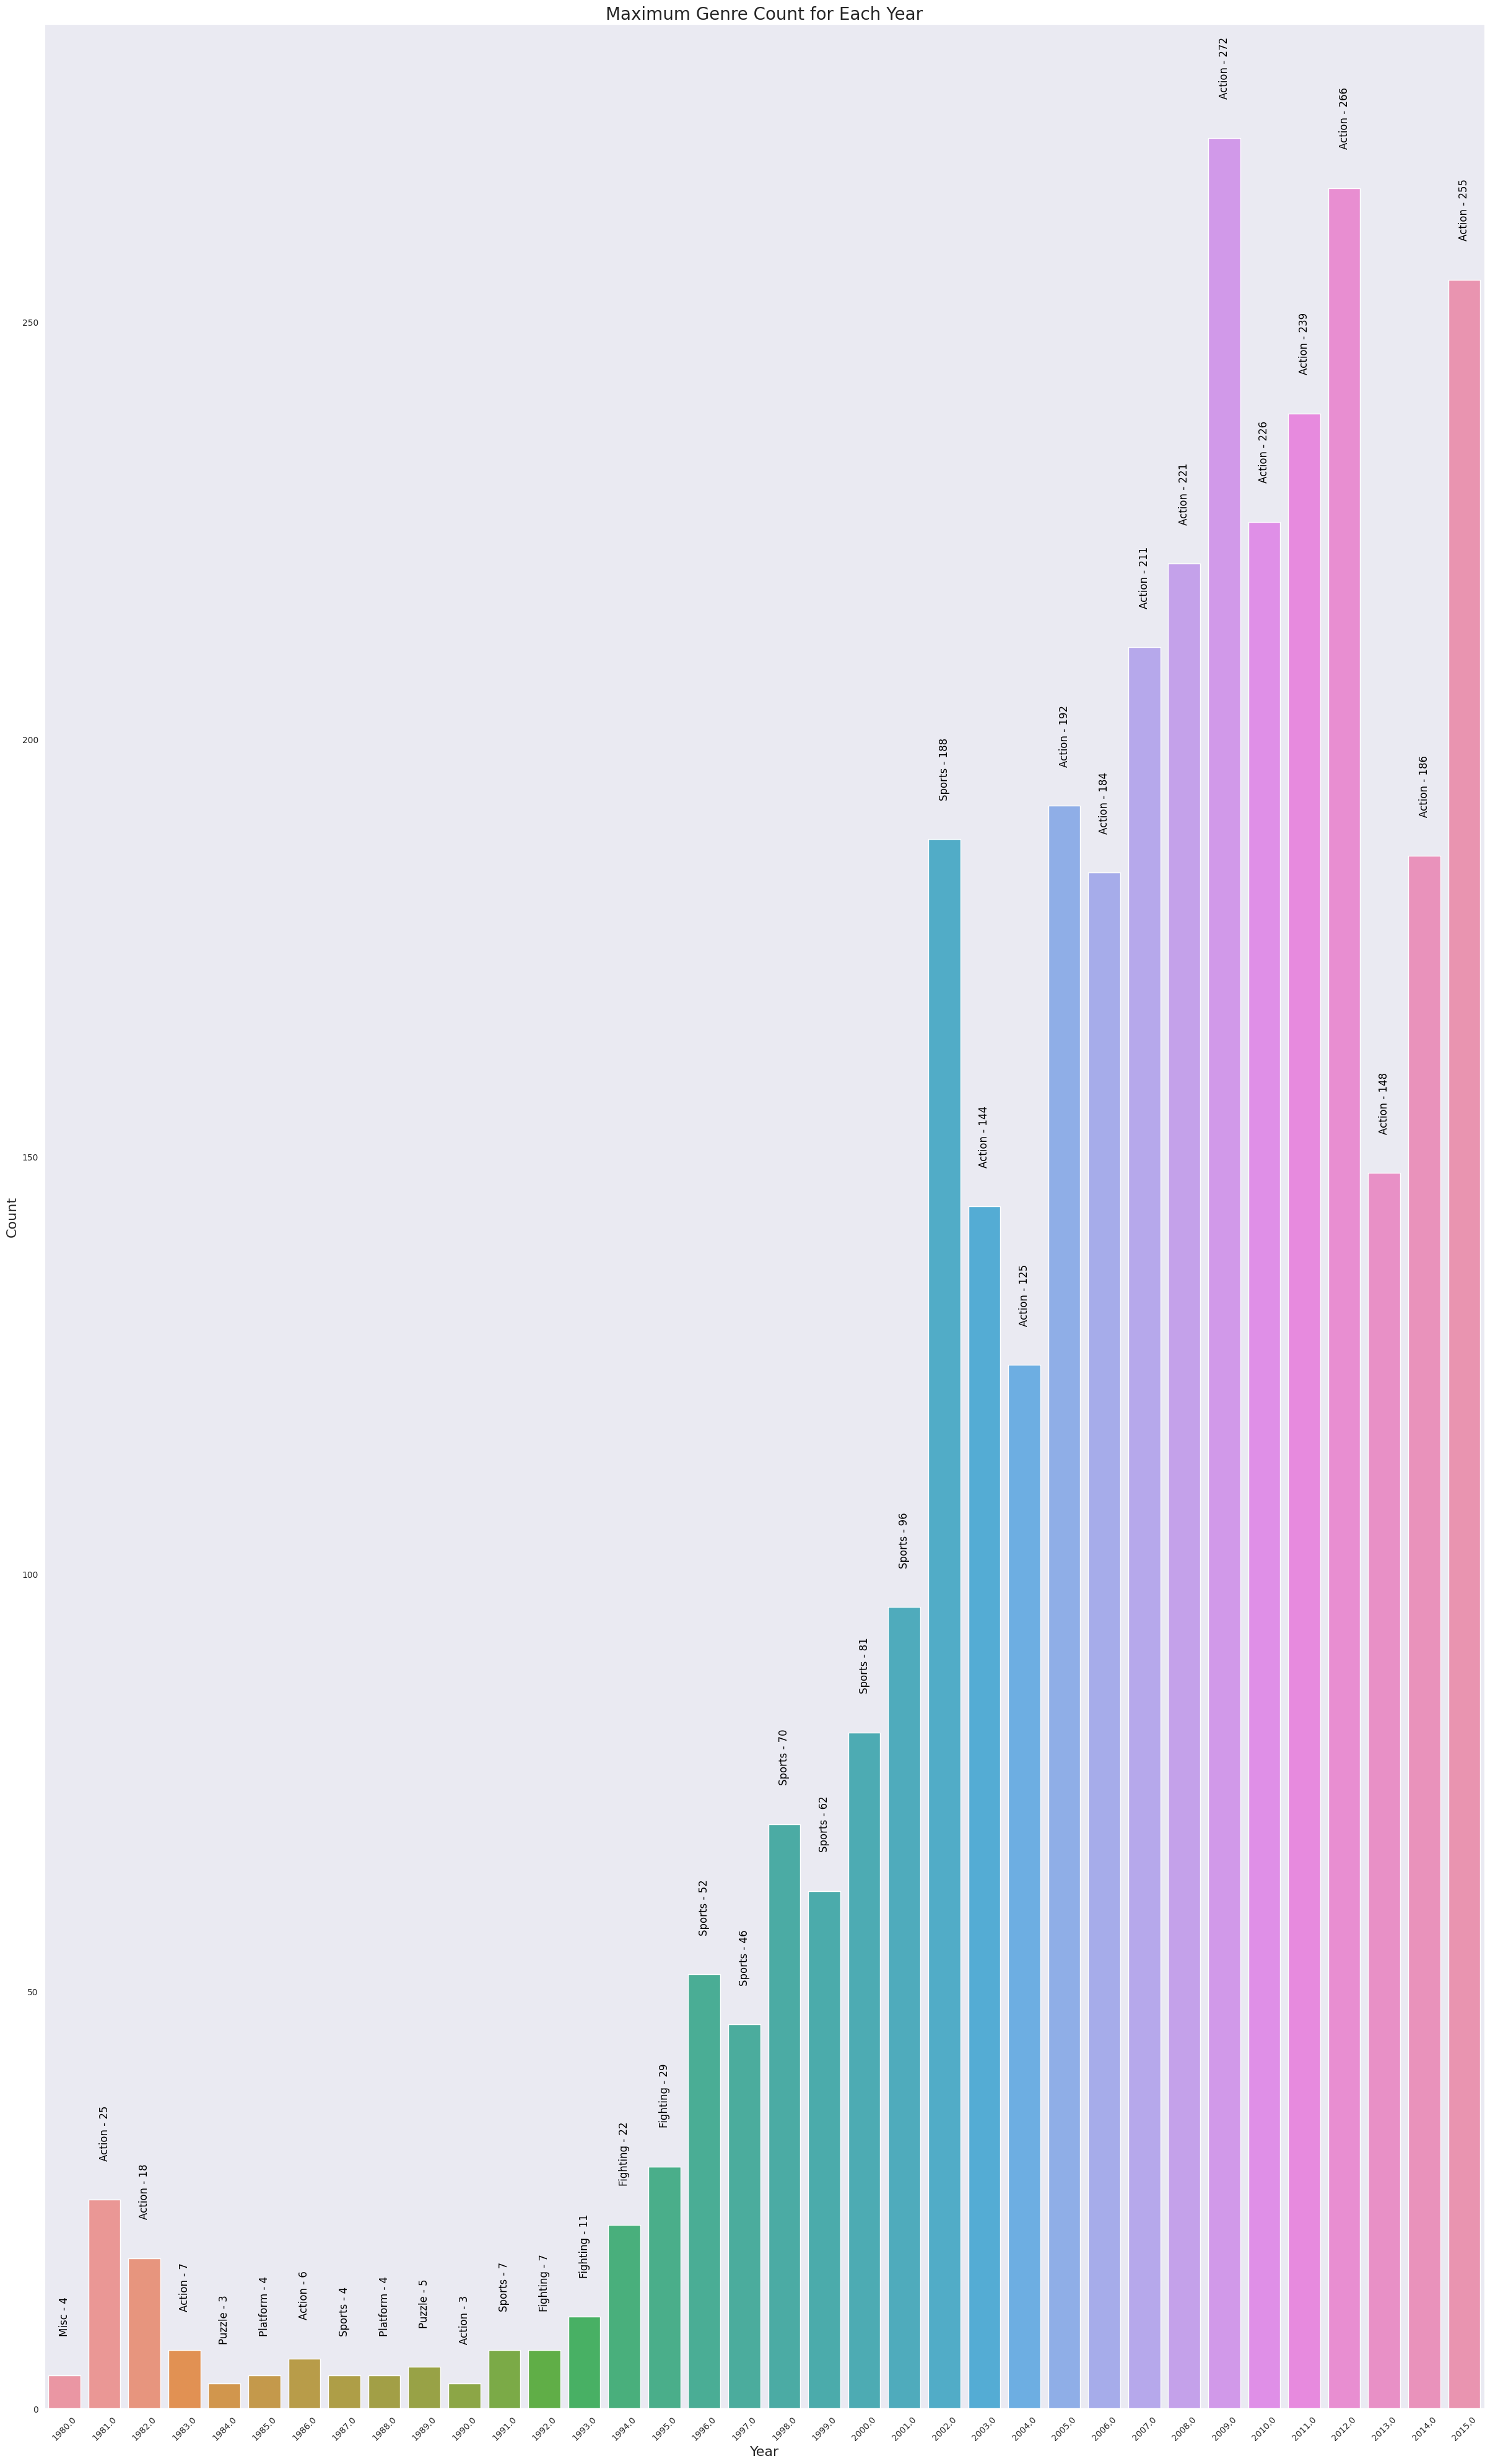

In [18]:
plt.figure(figsize=(30, 50))  # Adjust the figsize according to your preference

# Create the bar plot
bar_plot = sns.barplot(x='Year', y='count', data=year_max_genre)

# Add labels on top of each bar
for index, row in year_max_genre.iterrows():
    bar_plot.text(index, row['count'] + 5, f"{row['Genre']} - {row['count']}", color='#000', size=12, rotation=90, ha="center")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Label the x and y axes
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Set the title
plt.title('Maximum Genre Count for Each Year', fontsize=20)

plt.show()


# Which genre game has sold the most in a single year?

In [19]:
# Group by 'Year' and 'Genre', sum up the global sales, and reset the index
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Identify the rows with the maximum global sales for each year
year_sale_max = year_sale_dx.loc[year_sale_dx.groupby('Year')['Global_Sales'].idxmax()]

# Reset the index
year_sale_max = year_sale_max.reset_index(drop=True)

In [20]:
# Extract the genre with the highest global sales for each year
genre = year_sale_max['Genre']
year_sale_max

Year         Genre  Global_Sales
0   1980.0       Shooter          7.07
1   1981.0        Action         14.84
2   1982.0        Puzzle         10.03
3   1983.0      Platform          6.93
4   1984.0       Shooter         31.10
5   1985.0      Platform         43.17
6   1986.0        Action         13.74
7   1987.0      Fighting          5.42
8   1988.0      Platform         27.73
9   1989.0        Puzzle         37.75
10  1990.0      Platform         22.97
11  1991.0      Platform          7.64
12  1992.0      Fighting         15.25
13  1993.0      Platform         18.67
14  1994.0      Platform         28.74
15  1995.0      Platform         16.69
16  1996.0  Role-Playing         43.96
17  1997.0        Racing         31.91
18  1998.0        Sports         41.79
19  1999.0  Role-Playing         49.09
20  2000.0        Sports         41.19
21  2001.0        Action         59.39
22  2002.0        Action         86.77
23  2003.0        Action         67.93
24  2004.0        Action         76.26
25  2005.0        Action         85.69
26  2006.0        Sports        136.16
27  2007.0        Action        106.50
28  2008.0        Action        136.39
29  2009.0        Action        139.36
30  2010.0        Action        117.64
31  2011.0        Action        118.96
32  2012.0        Action        122.04
33  2013.0        Action        125.22
34  2014.0        Action         99.02
35  2015.0        Action         70.70

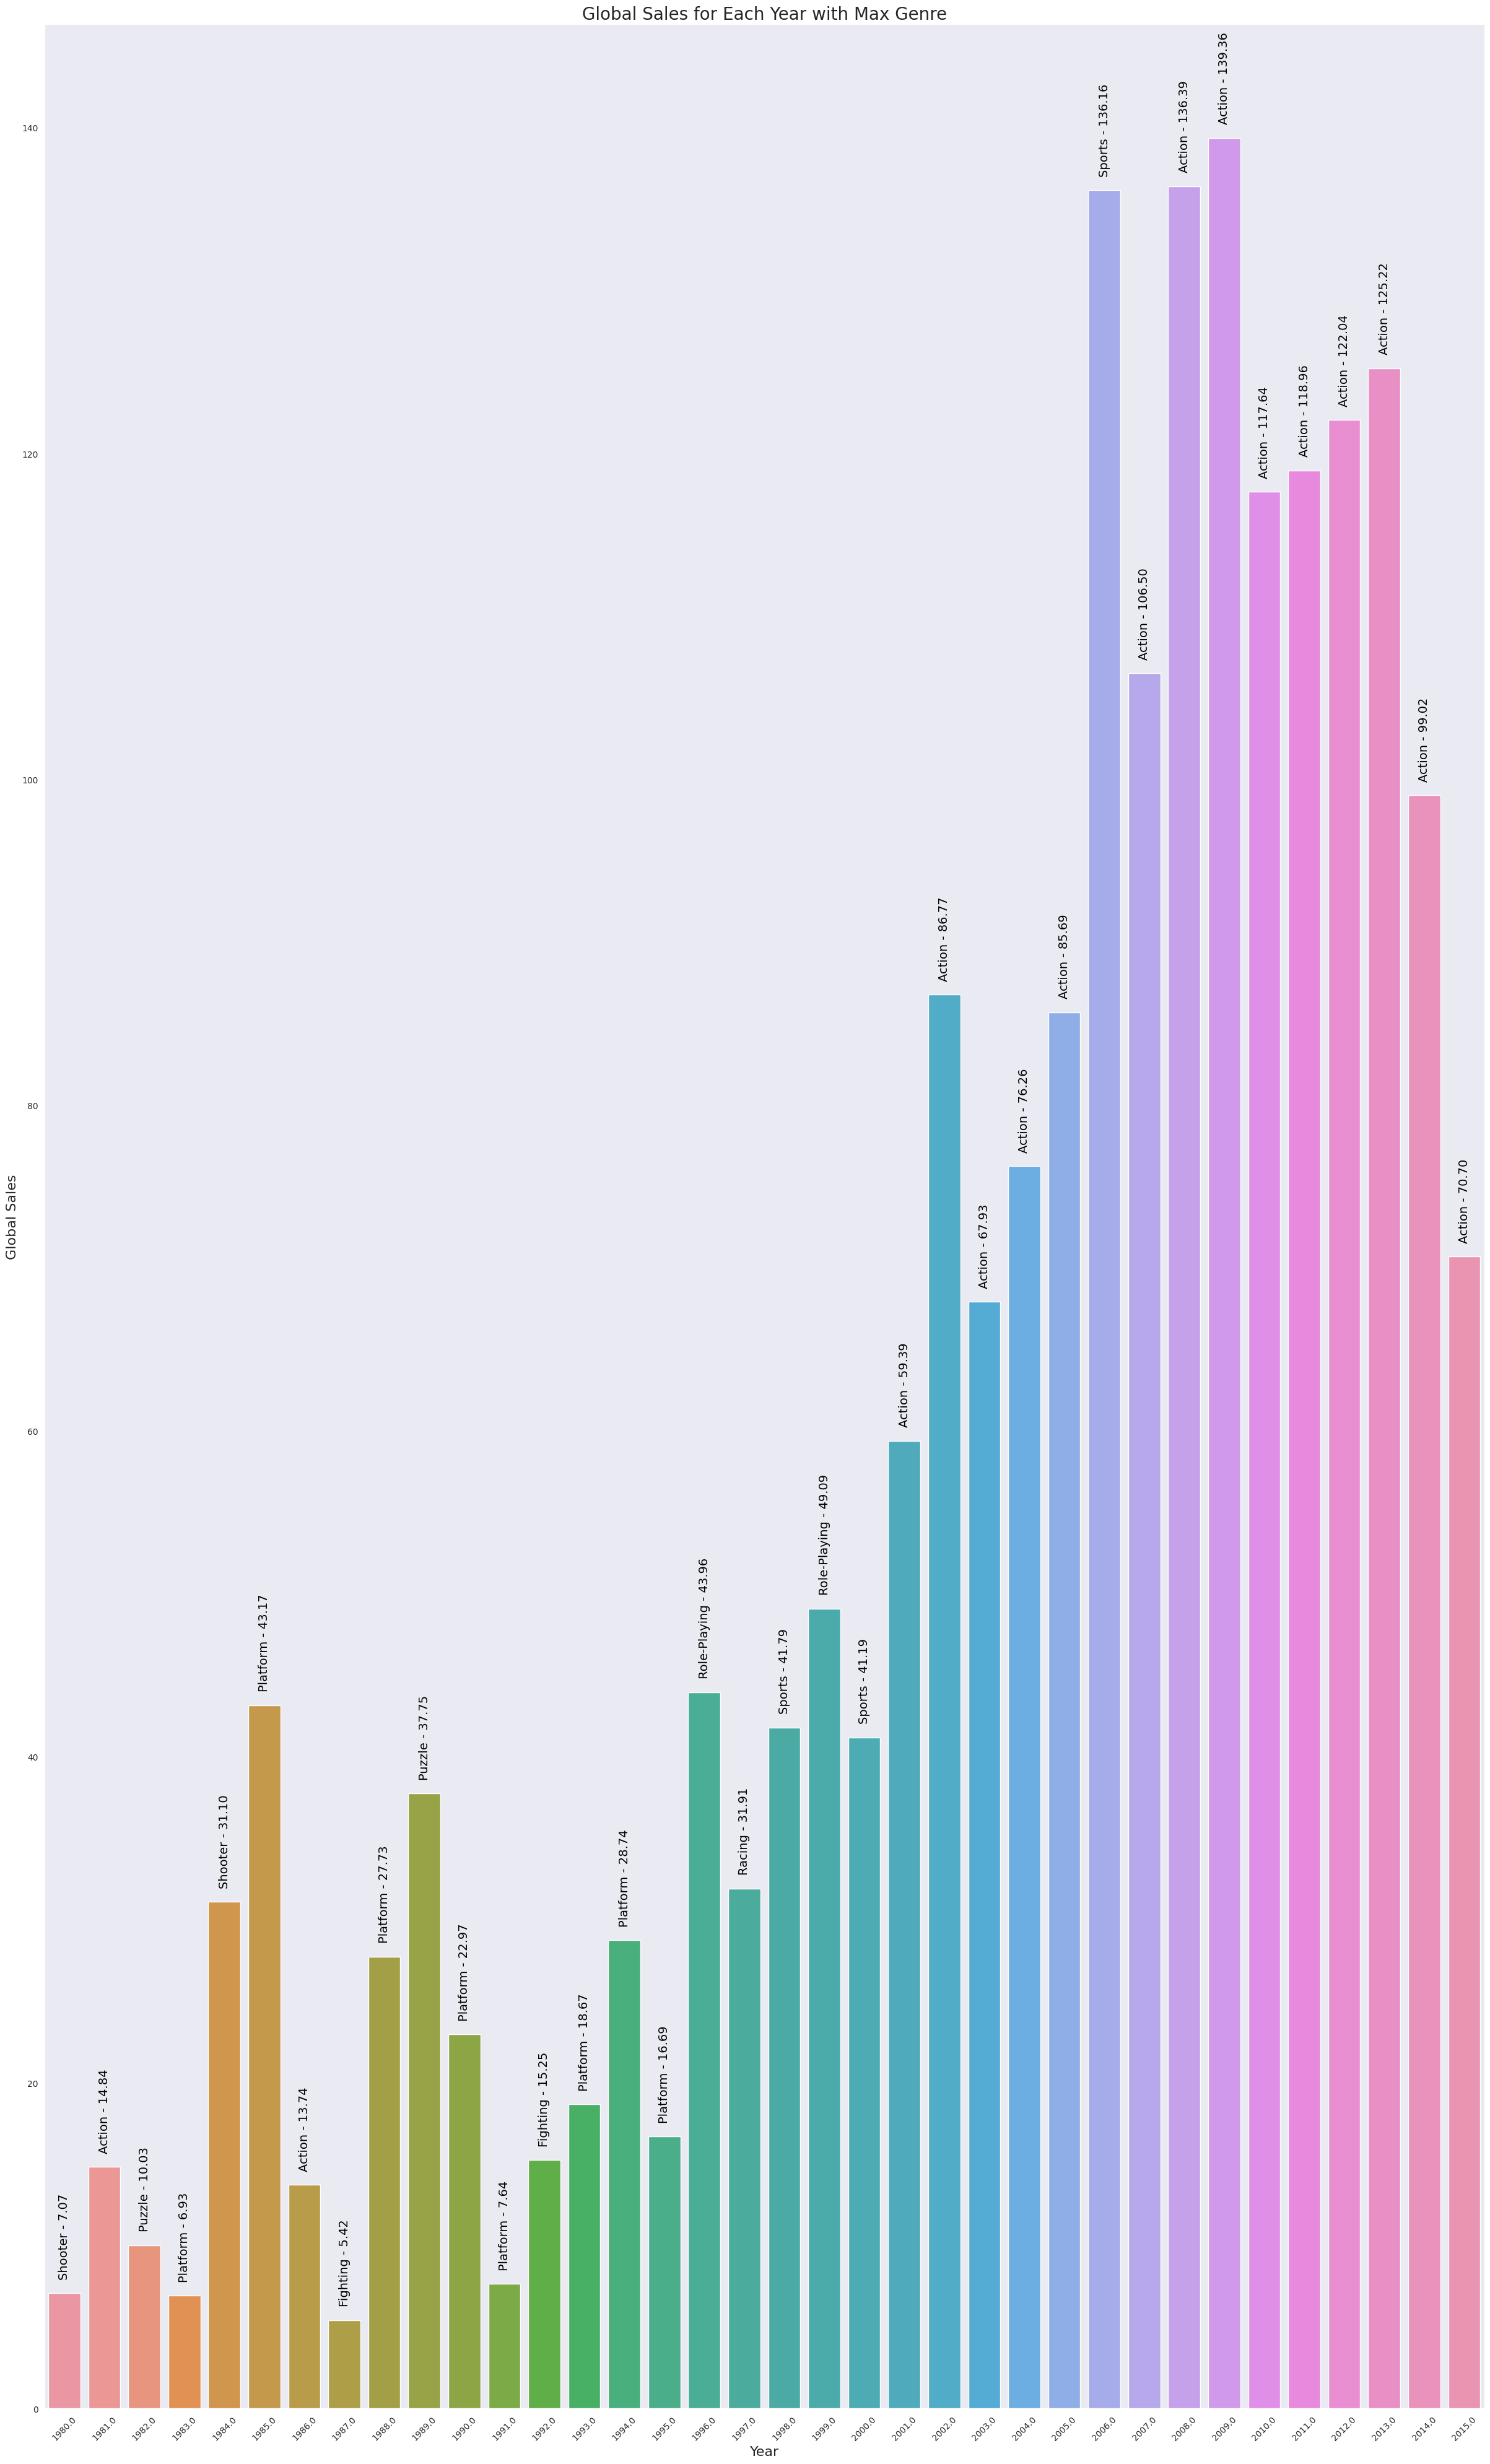

In [21]:
plt.figure(figsize=(30, 50))

# Create the bar plot
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)

# Add labels on top of each bar
for index, row in year_sale_max.iterrows():
    g.text(index, row['Global_Sales'] + 1, f"{row['Genre']} - {row['Global_Sales']:.2f}", color='#000', size=14, rotation=90, ha="center")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Label the x and y axes
plt.xlabel('Year', fontsize=16)
plt.ylabel('Global Sales', fontsize=16)

# Set the title
plt.title('Global Sales for Each Year with Max Genre', fontsize=20)

plt.show()


## The top-selling genre in a single year was Action in 2009 with global sales of 139.36 million, closely followed by Action in 2008 with 136.39 million.

# Identifying the genre of games with the highest global sales.

In [22]:
# Grouping the data by genre and calculating the total global sales for each genre.
data_genre = data.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)
print(data_genre.to_string(index=False))

       Genre  Global_Sales
      Action       1731.26
      Sports       1316.33
     Shooter       1019.15
Role-Playing        920.57
    Platform        829.30
        Misc        808.79
      Racing        730.40
    Fighting        445.05
  Simulation        391.52
      Puzzle        244.95
   Adventure        237.23
    Strategy        174.62


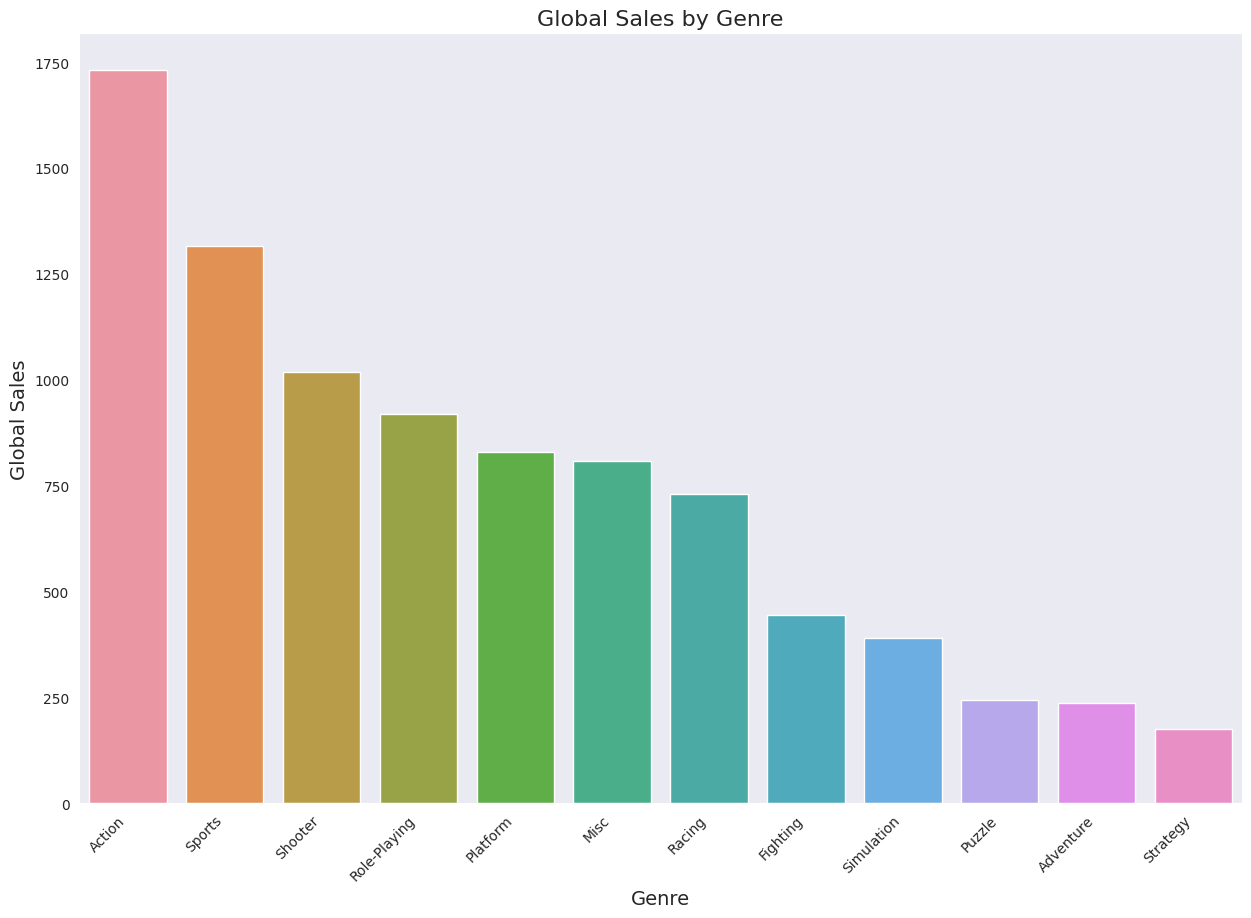

In [23]:
plt.figure(figsize=(15, 10))
# Create a bar plot of global sales by genre
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Global Sales', fontsize=14)
plt.title('Global Sales by Genre', fontsize=16)
plt.show()

# Determining the platform with the highest total global sales.

In [24]:
# Grouping the data by platform and calculating the total global sales for each platform.
data_platform = data.groupby(by='Platform')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)
print(data_platform.to_string(index=False))

Platform  Global_Sales
     PS2       1255.64
    X360        979.13
     PS3        955.25
     Wii        926.71
      DS        822.20
      PS        730.66
     GBA        318.50
     PSP        296.28
      XB        258.26
      PC        256.22
      GB        255.45
     NES        251.07
     3DS        240.86
     PS4        238.82
     N64        218.88
    SNES        200.05
      GC        199.36
    XOne        128.69
    2600         97.08
    WiiU         78.57
     PSV         58.51
     SAT         33.59
     GEN         28.36
      DC         15.97
     SCD          1.87
      NG          1.44
      WS          1.42
    TG16          0.16
     3DO          0.10
      GG          0.04
    PCFX          0.03


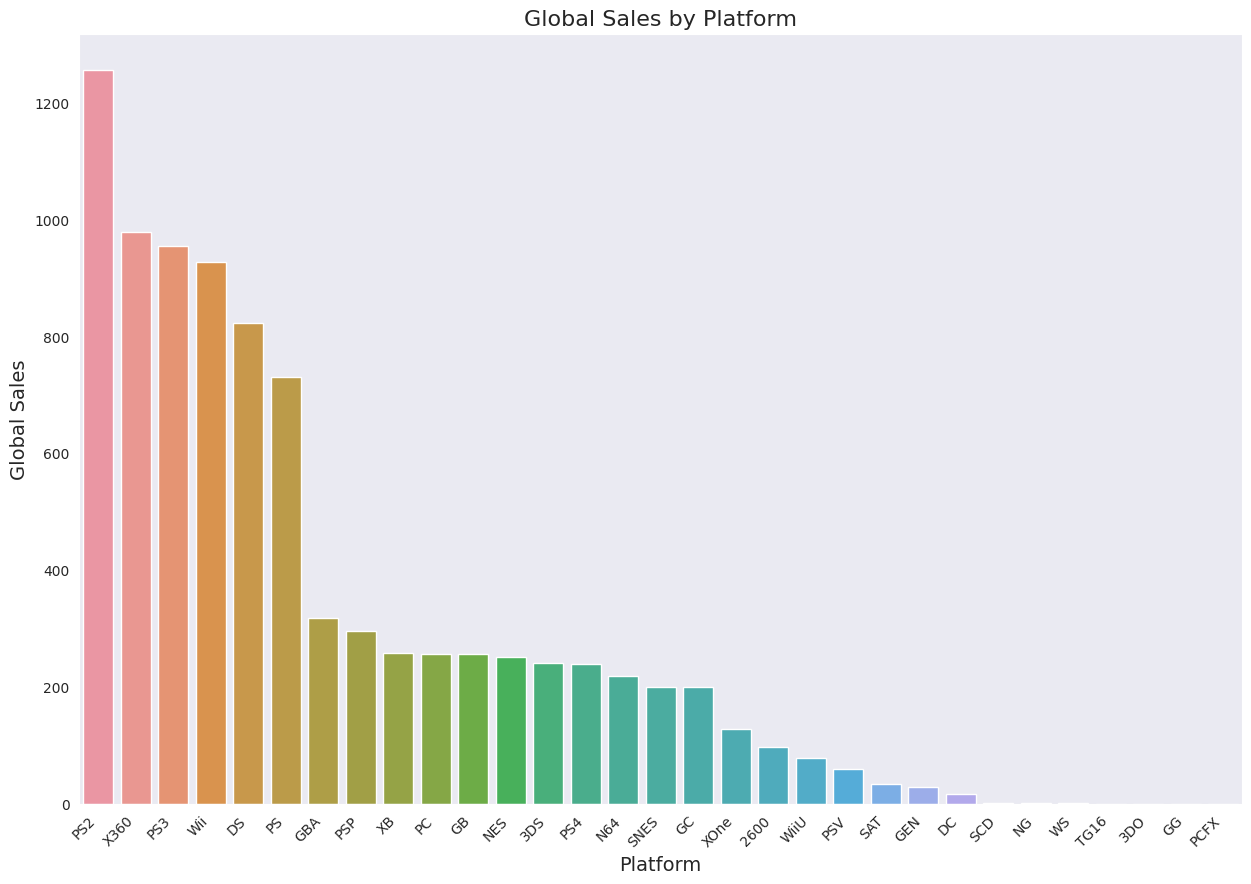

In [25]:
plt.figure(figsize=(15, 10))
# Create a bar plot of global sales by platform
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Global Sales', fontsize=14)
plt.title('Global Sales by Platform', fontsize=16)
plt.show()

# Identifying the individual game with the highest global sales.


In [26]:
# Select the top 20 games based on global sales by first extracting columns for 'Name', 'Year', 'Genre', and 'Global_Sales',
# then using the nlargest function to directly retrieve the 20 rows with the highest global sales.
top_game_sale = data[['Name', 'Year', 'Genre', 'Global_Sales']].nlargest(20, 'Global_Sales')
top_game_sale

Name    Year         Genre  \
0                                     Wii Sports  2006.0        Sports   
1                              Super Mario Bros.  1985.0      Platform   
2                                 Mario Kart Wii  2008.0        Racing   
3                              Wii Sports Resort  2009.0        Sports   
4                       Pokemon Red/Pokemon Blue  1996.0  Role-Playing   
5                                         Tetris  1989.0        Puzzle   
6                          New Super Mario Bros.  2006.0      Platform   
7                                       Wii Play  2006.0          Misc   
8                      New Super Mario Bros. Wii  2009.0      Platform   
9                                      Duck Hunt  1984.0       Shooter   
10                                    Nintendogs  2005.0    Simulation   
11                                 Mario Kart DS  2005.0        Racing   
12                   Pokemon Gold/Pokemon Silver  1999.0  Role-Playing   
13                                       Wii Fit  2007.0        Sports   
14                                  Wii Fit Plus  2009.0        Sports   
15                            Kinect Adventures!  2010.0          Misc   
16                            Grand Theft Auto V  2013.0        Action   
17                 Grand Theft Auto: San Andreas  2004.0        Action   
18                             Super Mario World  1990.0      Platform   
19  Brain Age: Train Your Brain in Minutes a Day  2005.0          Misc   

    Global_Sales  
0          82.74  
1          40.24  
2          35.82  
3          33.00  
4          31.37  
5          30.26  
6          30.01  
7          29.02  
8          28.62  
9          28.31  
10         24.76  
11         23.42  
12         23.10  
13         22.72  
14         22.00  
15         21.82  
16         21.40  
17         20.81  
18         20.61  
19         20.22

In [27]:
# Extract the 'Name' and 'Year' columns from the DataFrame top_game_sale
name = top_game_sale['Name']
year = top_game_sale['Year']

# Create an array y ranging from 0 to 19 for plotting purposes
y = np.arange(0, 20)

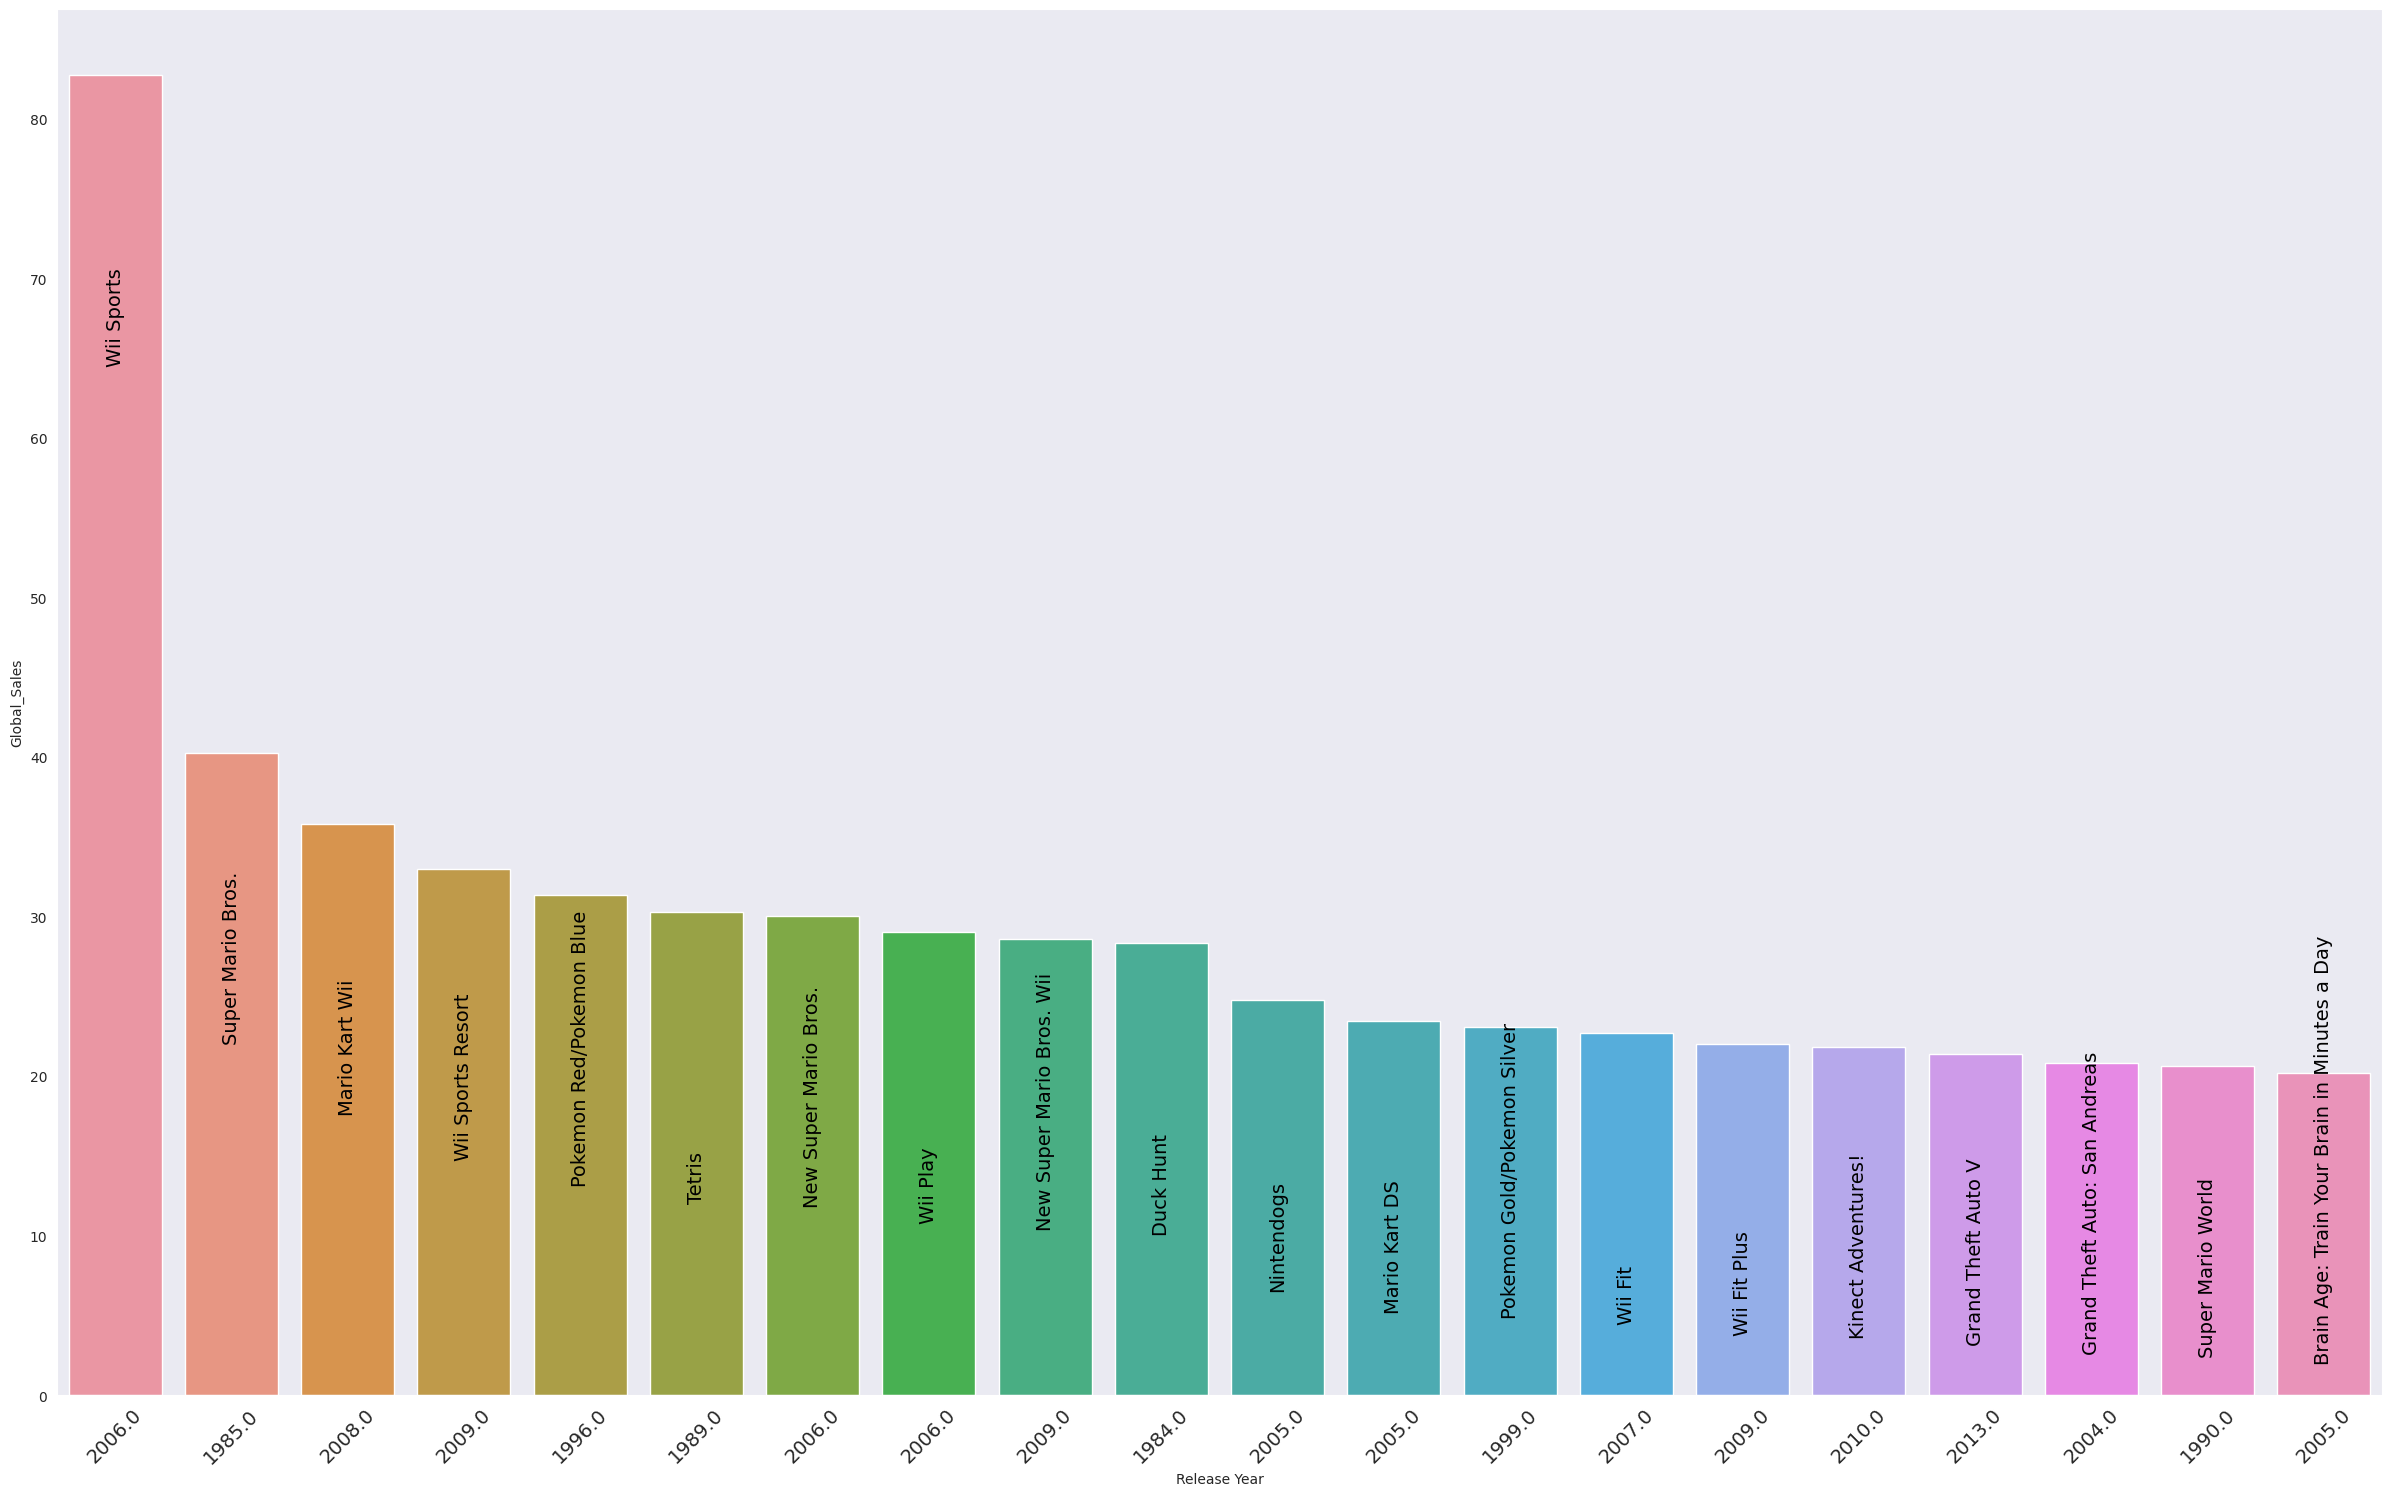

In [28]:
# Create a bar plot to visualize global sales of the top games, with game names annotated above each bar
plt.figure(figsize=(30, 18))
bar_plot = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)

# Add annotations for game names above each bar
index = 0
for value in top_game_sale['Global_Sales']:
    bar_plot.text(index, value - 18, name[index], color='#000', size=14, rotation=90, ha="center")
    index += 1
plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=45)
plt.xlabel('Release Year')

plt.show()


# Comparing sales across different genres.

In [29]:
# Select relevant columns ('Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales') from the original DataFrame
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Group the data by 'Genre' and calculate the total sales across different regions
comp_map = comp_genre.groupby(by=['Genre']).sum()

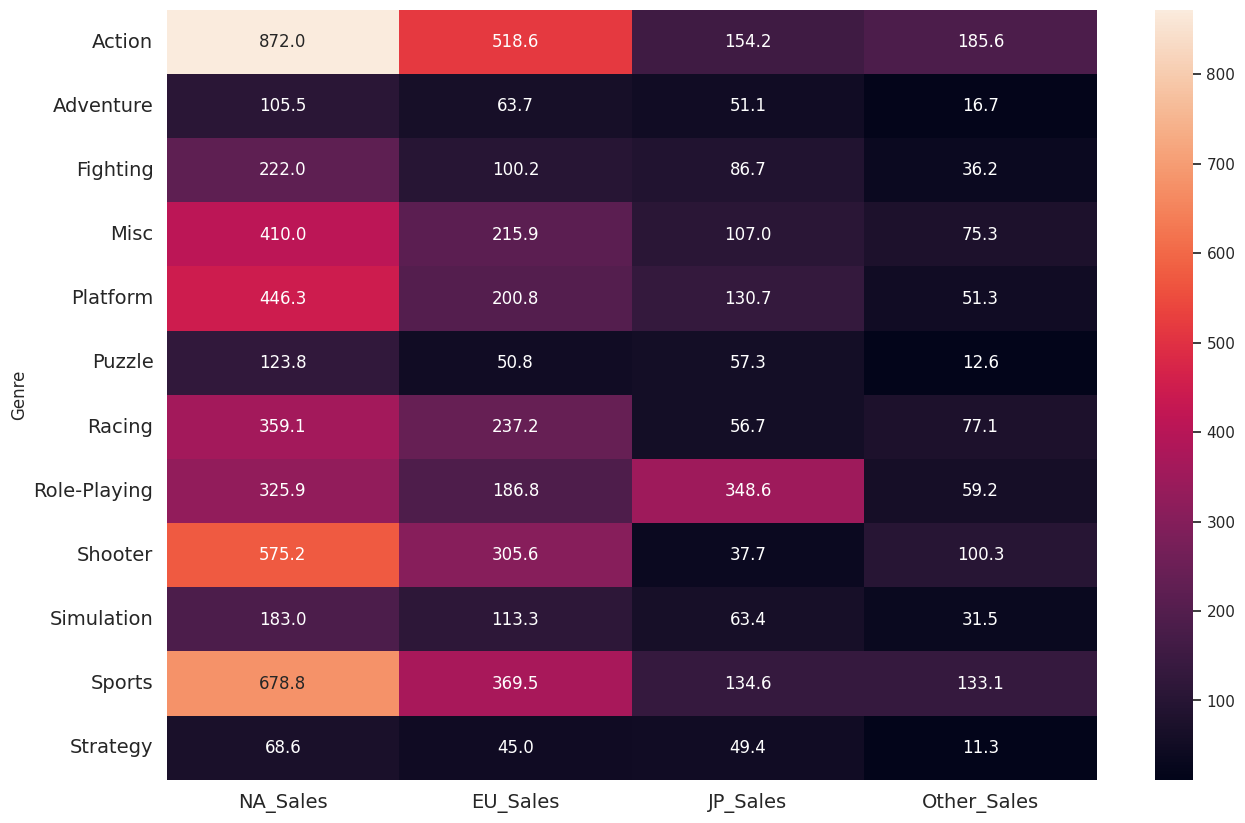

In [30]:
# Create a heatmap to visualize total sales of video games across different genres and regions
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
# Plot the heatmap with annotations showing total sales, formatted to one decimal place
sns.heatmap(comp_map, annot=True, fmt='.1f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [31]:
# Reset index of comp_map to convert the 'Genre' column into a regular column
comp_table = comp_map.reset_index()
# Melt the DataFrame to unpivot it from wide to long format, creating a tidy DataFrame
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
# Display the first few rows of the melted DataFrame
comp_table.head()

Genre Sale_Area  Sale_Price
0     Action  NA_Sales      871.96
1  Adventure  NA_Sales      105.46
2   Fighting  NA_Sales      221.99
3       Misc  NA_Sales      410.02
4   Platform  NA_Sales      446.26

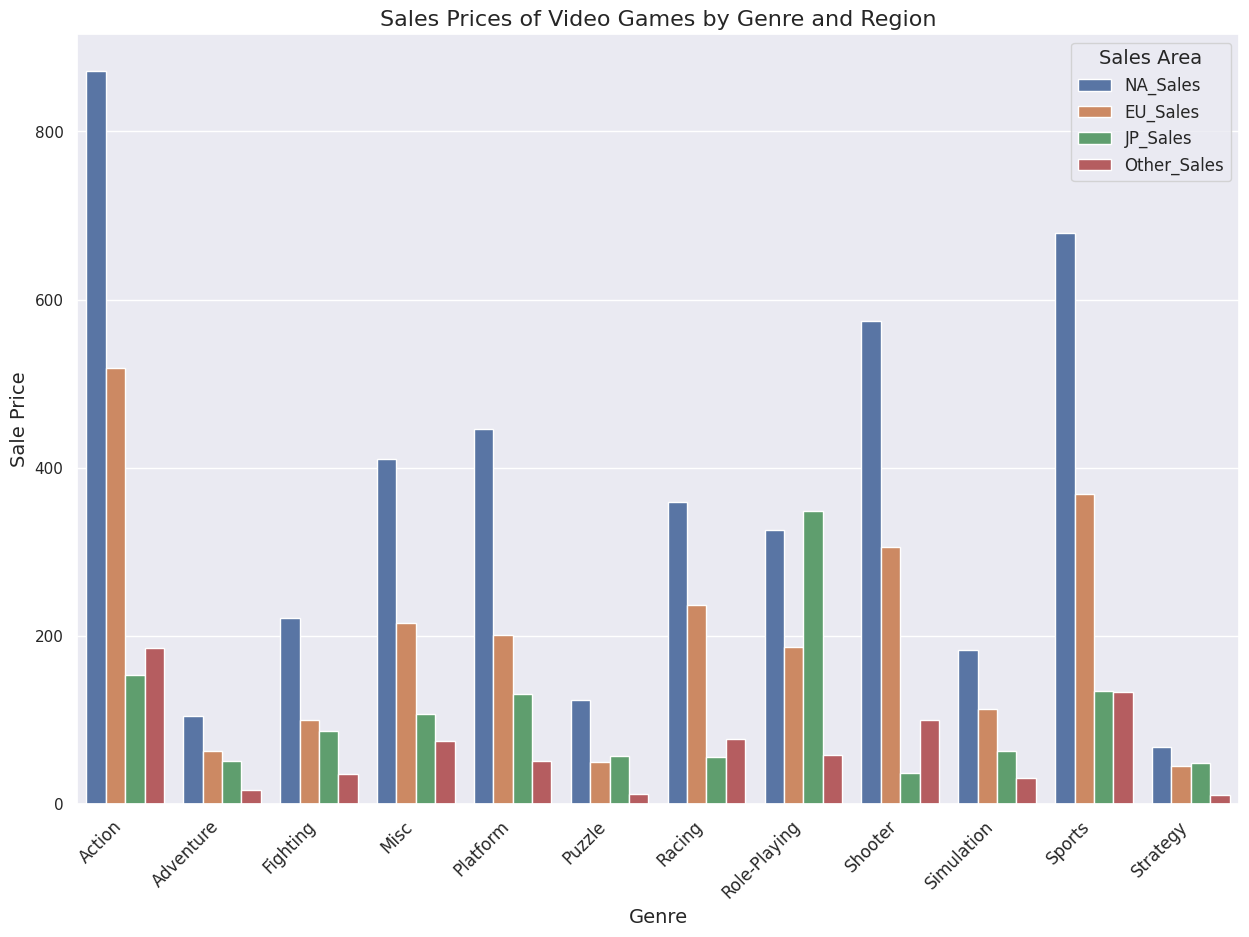

In [32]:
plt.figure(figsize=(15, 10))

# Create a bar plot to visualize sales prices of video games across different genres and regions
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.title('Sales Prices of Video Games by Genre and Region', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Sales Area', title_fontsize='14', fontsize='12')

plt.show()

# Analyzing sales comparison across different platforms.

In [33]:
# Select relevant columns ('Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales') from the original DataFrame
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Display the first few rows of the new DataFrame
comp_platform.head()

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      Wii     41.49     29.02      3.77         8.46
1      NES     29.08      3.58      6.81         0.77
2      Wii     15.85     12.88      3.79         3.31
3      Wii     15.75     11.01      3.28         2.96
4       GB     11.27      8.89     10.22         1.00

In [34]:
# Group the comp_platform DataFrame by 'Platform' and calculate the sum of sales for each platform across different regions
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_platform

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      2600     90.60      5.47      0.00         0.91
1       3DO      0.00      0.00      0.10         0.00
2       3DS     78.04     57.95     92.32        12.51
3        DC      5.43      1.69      8.56         0.27
4        DS    390.44    194.65    175.57        60.51
5        GB    114.32     47.82     85.12         8.20
6       GBA    187.54     75.25     47.33         7.73
7        GC    133.46     38.71     21.58         5.18
8       GEN     19.27      5.52      2.67         0.89
9        GG      0.00      0.00      0.04         0.00
10      N64    139.02     41.06     34.22         4.38
11      NES    125.94     21.15     98.65         5.31
12       NG      0.00      0.00      1.44         0.00
13       PC     92.44    138.09      0.17        24.69
14     PCFX      0.00      0.00      0.03         0.00
15       PS    336.51    213.60    139.82        40.91
16      PS2    583.84    339.29    139.20       193.44
17      PS3    391.86    342.91     78.86       141.71
18      PS4     84.94    106.22     10.04        37.63
19      PSP    108.99     68.25     76.79        42.19
20      PSV     16.01     16.03     18.19         8.31
21      SAT      0.72      0.54     32.26         0.07
22      SCD      1.00      0.36      0.45         0.05
23     SNES     61.23     19.04    116.55         3.22
24     TG16      0.00      0.00      0.16         0.00
25       WS      0.00      0.00      1.42         0.00
26      Wii    507.71    268.38     69.35        80.61
27     WiiU     36.83     23.24     12.24         6.20
28     X360    600.69    280.18     12.43        85.47
29       XB    186.69     60.95      1.38         8.72
30     XOne     76.50     41.02      0.33        10.87

In [35]:
# Melt the comp_platform DataFrame to unpivot it from wide to long format, creating a tidy DataFrame
# This transformation converts separate columns for sales in different regions to a single 'Sale_Area' column
# and a corresponding 'Sale_Price' column
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

# Display the first few rows of the melted DataFrame
comp_table.head()

Platform Sale_Area  Sale_Price
0     2600  NA_Sales       90.60
1      3DO  NA_Sales        0.00
2      3DS  NA_Sales       78.04
3       DC  NA_Sales        5.43
4       DS  NA_Sales      390.44

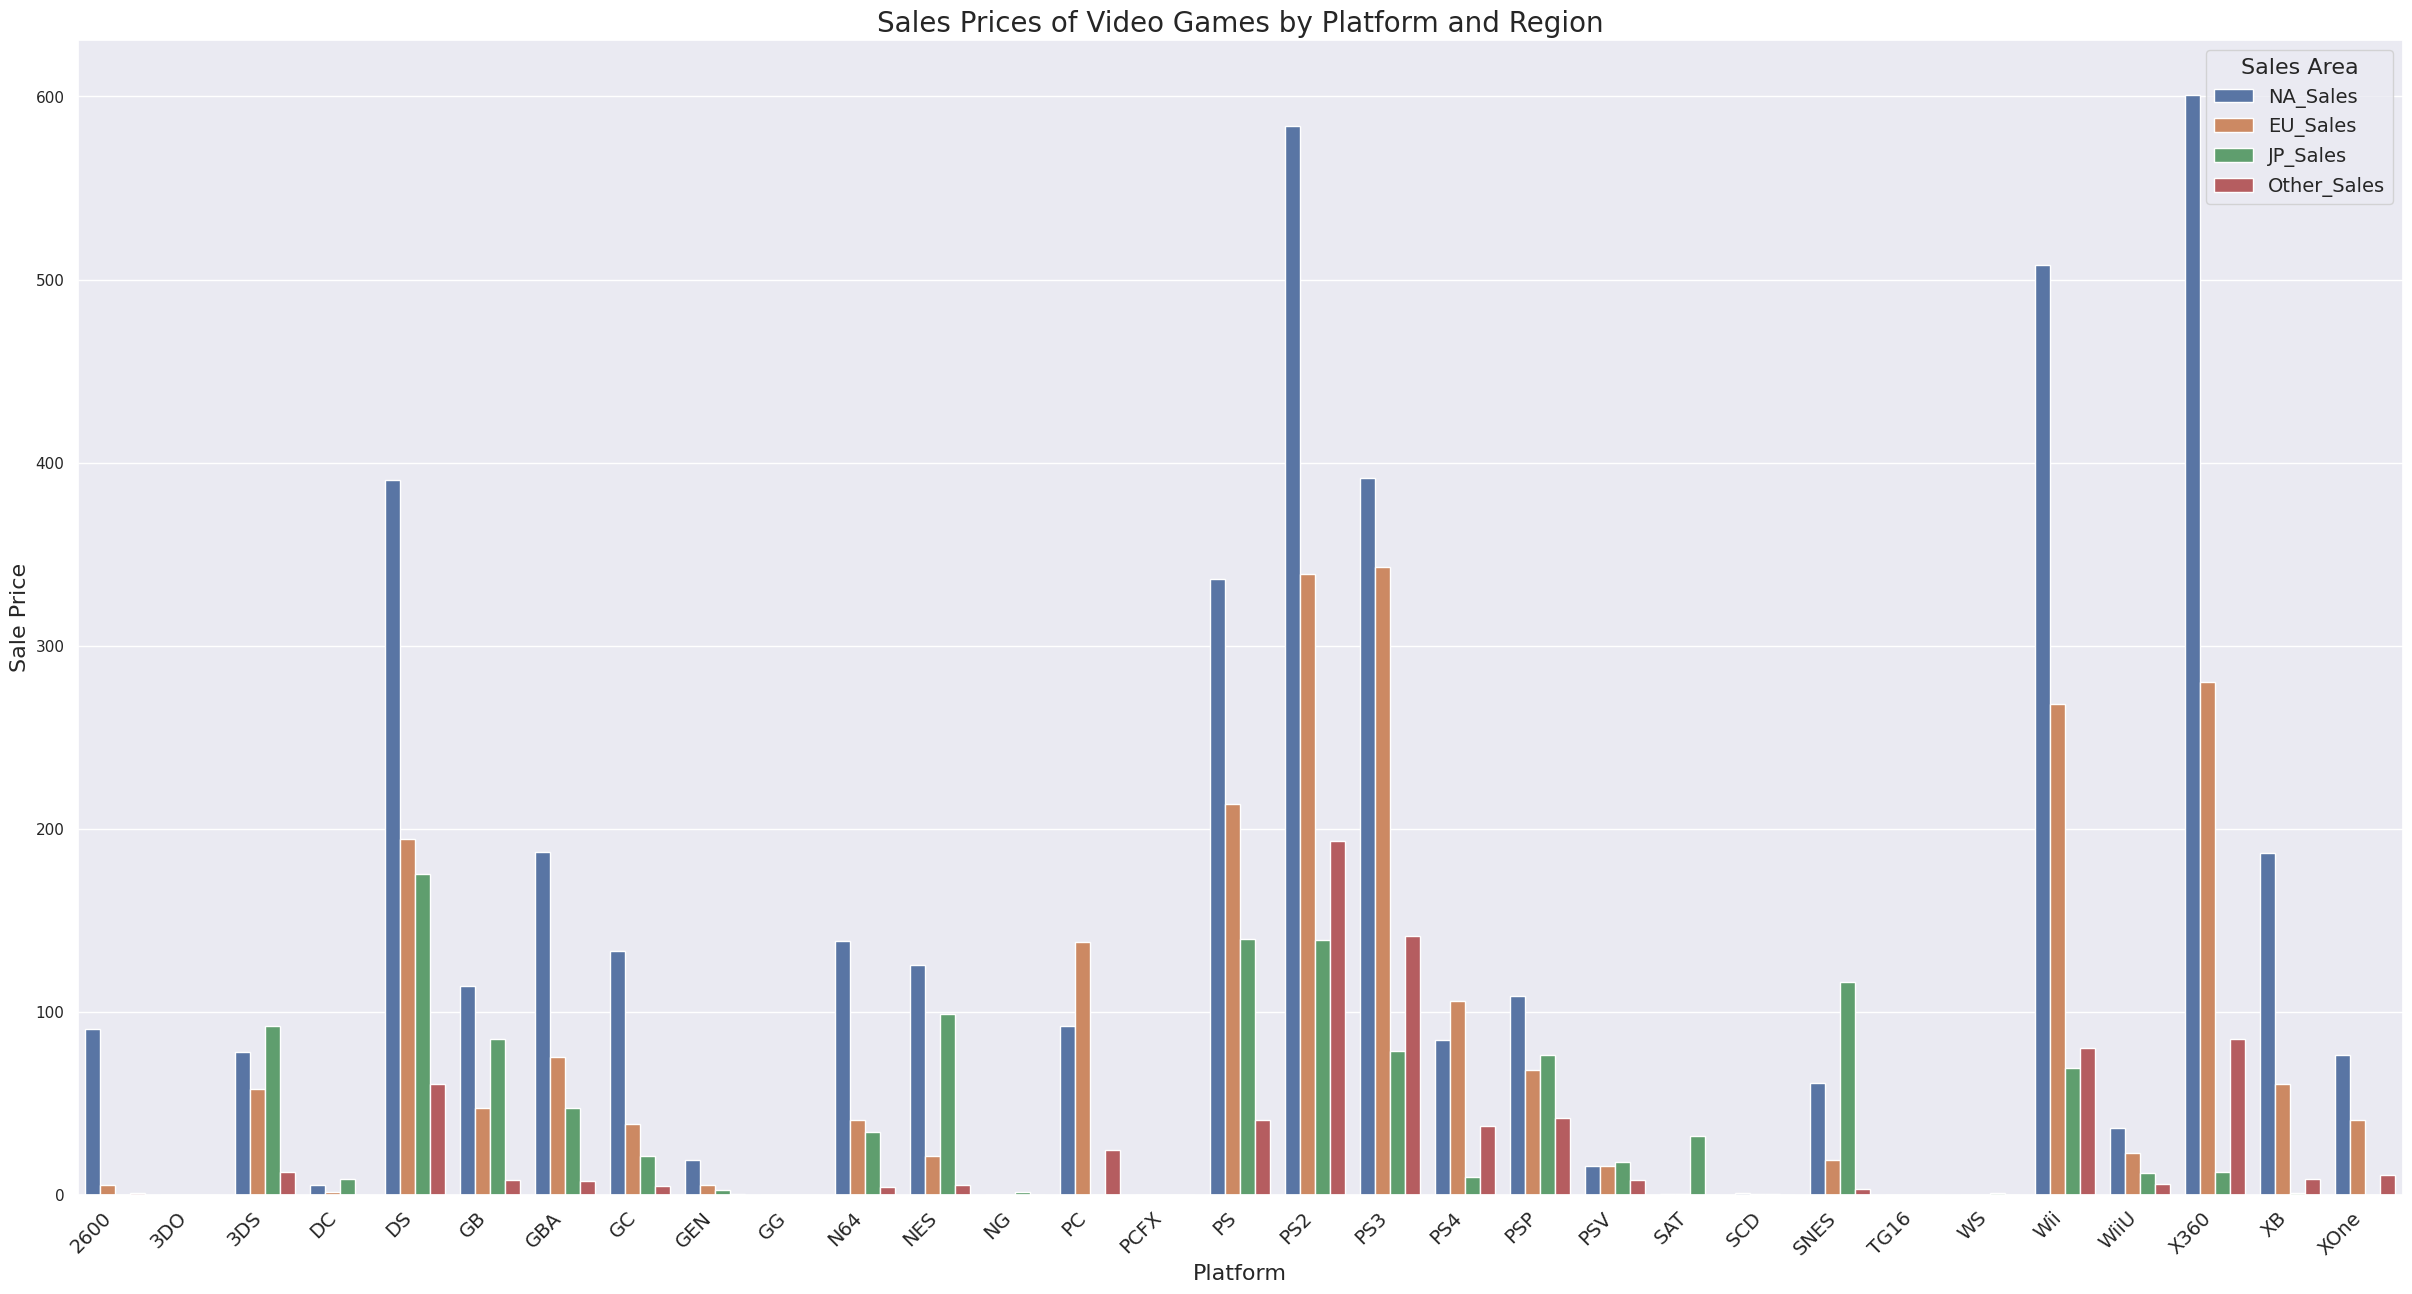

In [36]:
plt.figure(figsize=(30, 15))

# Create a bar plot to visualize sales prices of video games across different platforms and regions
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xlabel('Platform', fontsize=16)
plt.ylabel('Sale Price', fontsize=16)
plt.title('Sales Prices of Video Games by Platform and Region', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.legend(title='Sales Area', title_fontsize='16', fontsize='14')
plt.show()

# Identifying the top 20 publishers based on the number of games released.

In [37]:
# Group the data DataFrame by 'Publisher', count the number of occurrences of each publisher,
# select the top 20 publishers with the highest counts, and store the result in top_publisher
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

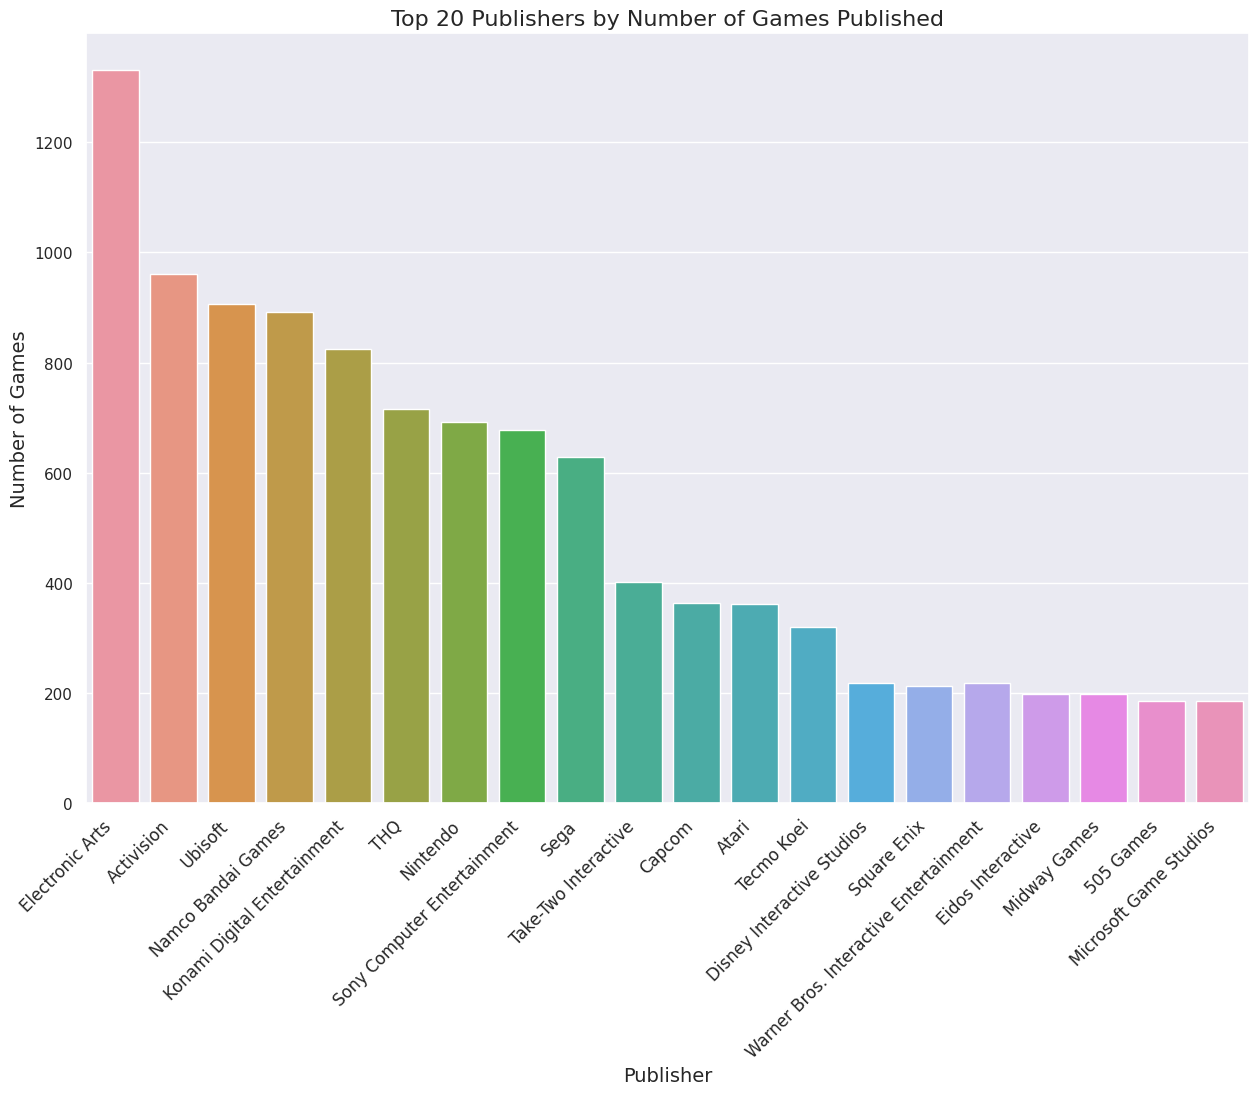

In [38]:
plt.figure(figsize=(15, 10))

# Create a count plot to visualize the number of games published by each publisher
sns.countplot(x="Publisher", data=data, order=data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.title('Top 20 Publishers by Number of Games Published', fontsize=16)
plt.show()

# Determining the top publishers based on their total global sales.

In [39]:
# Select the 'Publisher' and 'Global_Sales' columns from the original DataFrame
# Calculate the total global sales for each publisher
# Select the top 20 publishers with the highest total global sales and store the result in sale_pbl
sale_pbl = data[['Publisher', 'Global_Sales']].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl

Publisher  Global_Sales
0                                 Nintendo       1783.09
1                          Electronic Arts       1098.07
2                               Activision        723.79
3              Sony Computer Entertainment        600.94
4                                  Ubisoft        464.67
5                     Take-Two Interactive        396.65
6                                      THQ        340.77
7             Konami Digital Entertainment        282.43
8                                     Sega        272.18
9                       Namco Bandai Games        247.60
10                  Microsoft Game Studios        244.37
11                                  Capcom        198.77
12                                   Atari        157.20
13  Warner Bros. Interactive Entertainment        150.37
14                             Square Enix        141.65
15              Disney Interactive Studios        119.96
16                       Eidos Interactive         98.98
17                               LucasArts         87.34
18                      Bethesda Softworks         79.89
19                            Midway Games         69.85

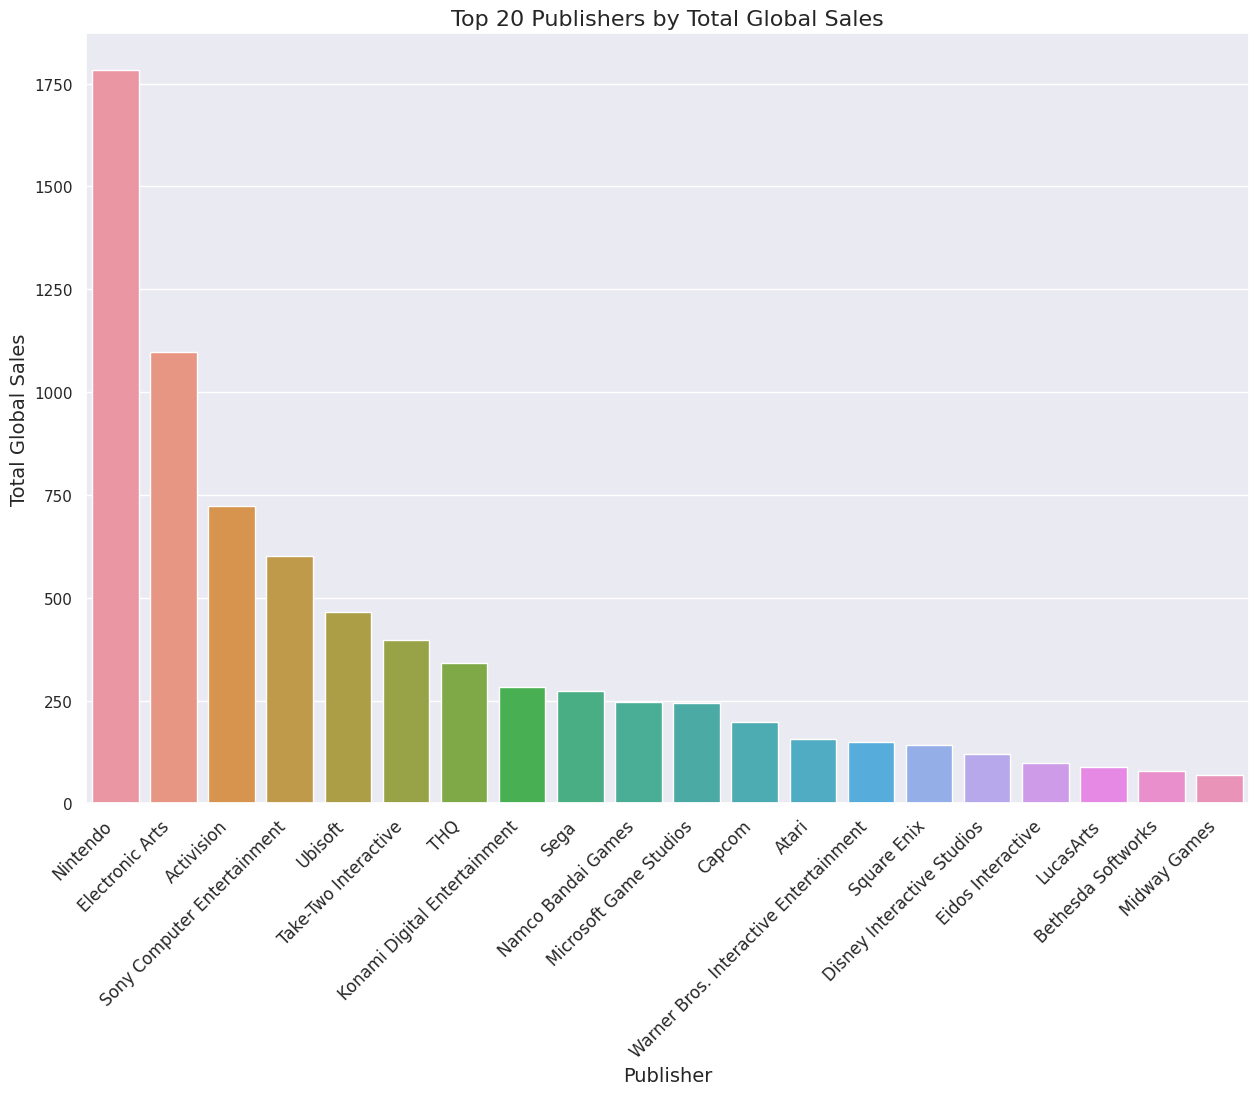

In [40]:
plt.figure(figsize=(15, 10))

# Create a bar plot to visualize the total global sales of the top 20 publishers
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Total Global Sales', fontsize=14)
plt.title('Top 20 Publishers by Total Global Sales', fontsize=16)
plt.show()

# Comparing sales across different publishers.

In [41]:
# Select relevant columns ('Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales') 
# from the original DataFrame to create a new DataFrame comp_publisher
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0  Nintendo     41.49     29.02      3.77         8.46         82.74
1  Nintendo     29.08      3.58      6.81         0.77         40.24
2  Nintendo     15.85     12.88      3.79         3.31         35.82
3  Nintendo     15.75     11.01      3.28         2.96         33.00
4  Nintendo     11.27      8.89     10.22         1.00         31.37

In [42]:
# Group the comp_publisher DataFrame by 'Publisher', calculate the sum of sales for each publisher across different regions,
# reset the index to convert the 'Publisher' column back into a regular column, and sort the DataFrame by total global sales
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
# Select the top 20 publishers with the highest total global sales
comp_publisher = comp_publisher.head(20)
print(comp_publisher.to_string(index=False))

                             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
                              Nintendo    815.71    417.81    454.25        95.13       1783.09
                       Electronic Arts    591.43    364.36     13.95       128.14       1098.07
                            Activision    428.03    214.14      6.40        74.90        723.79
           Sony Computer Entertainment    262.79    184.85     73.88        79.40        600.94
                               Ubisoft    249.31    158.94      7.26        48.96        464.67
                  Take-Two Interactive    218.66    117.52      5.81        54.80        396.65
                                   THQ    208.77     94.73      5.01        32.14        340.77
          Konami Digital Entertainment     92.15     69.21     90.67        30.24        282.43
                                  Sega    109.27     81.86     56.54        24.49        272.18
                    Namco Bandai Games  

In [43]:
# Melt the comp_publisher DataFrame to unpivot it from wide to long format, creating a tidy DataFrame
# This transformation converts separate columns for sales in different regions to a single 'Sale_Area' column
# and a corresponding 'Sale_Price' column
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
# Display the melted DataFrame
comp_publisher

Publisher    Sale_Area  Sale_Price
0                      Nintendo     NA_Sales      815.71
1               Electronic Arts     NA_Sales      591.43
2                    Activision     NA_Sales      428.03
3   Sony Computer Entertainment     NA_Sales      262.79
4                       Ubisoft     NA_Sales      249.31
..                          ...          ...         ...
75   Disney Interactive Studios  Other_Sales       13.18
76            Eidos Interactive  Other_Sales        8.02
77                    LucasArts  Other_Sales       10.50
78           Bethesda Softworks  Other_Sales        9.87
79                 Midway Games  Other_Sales        5.74

[80 rows x 3 columns]

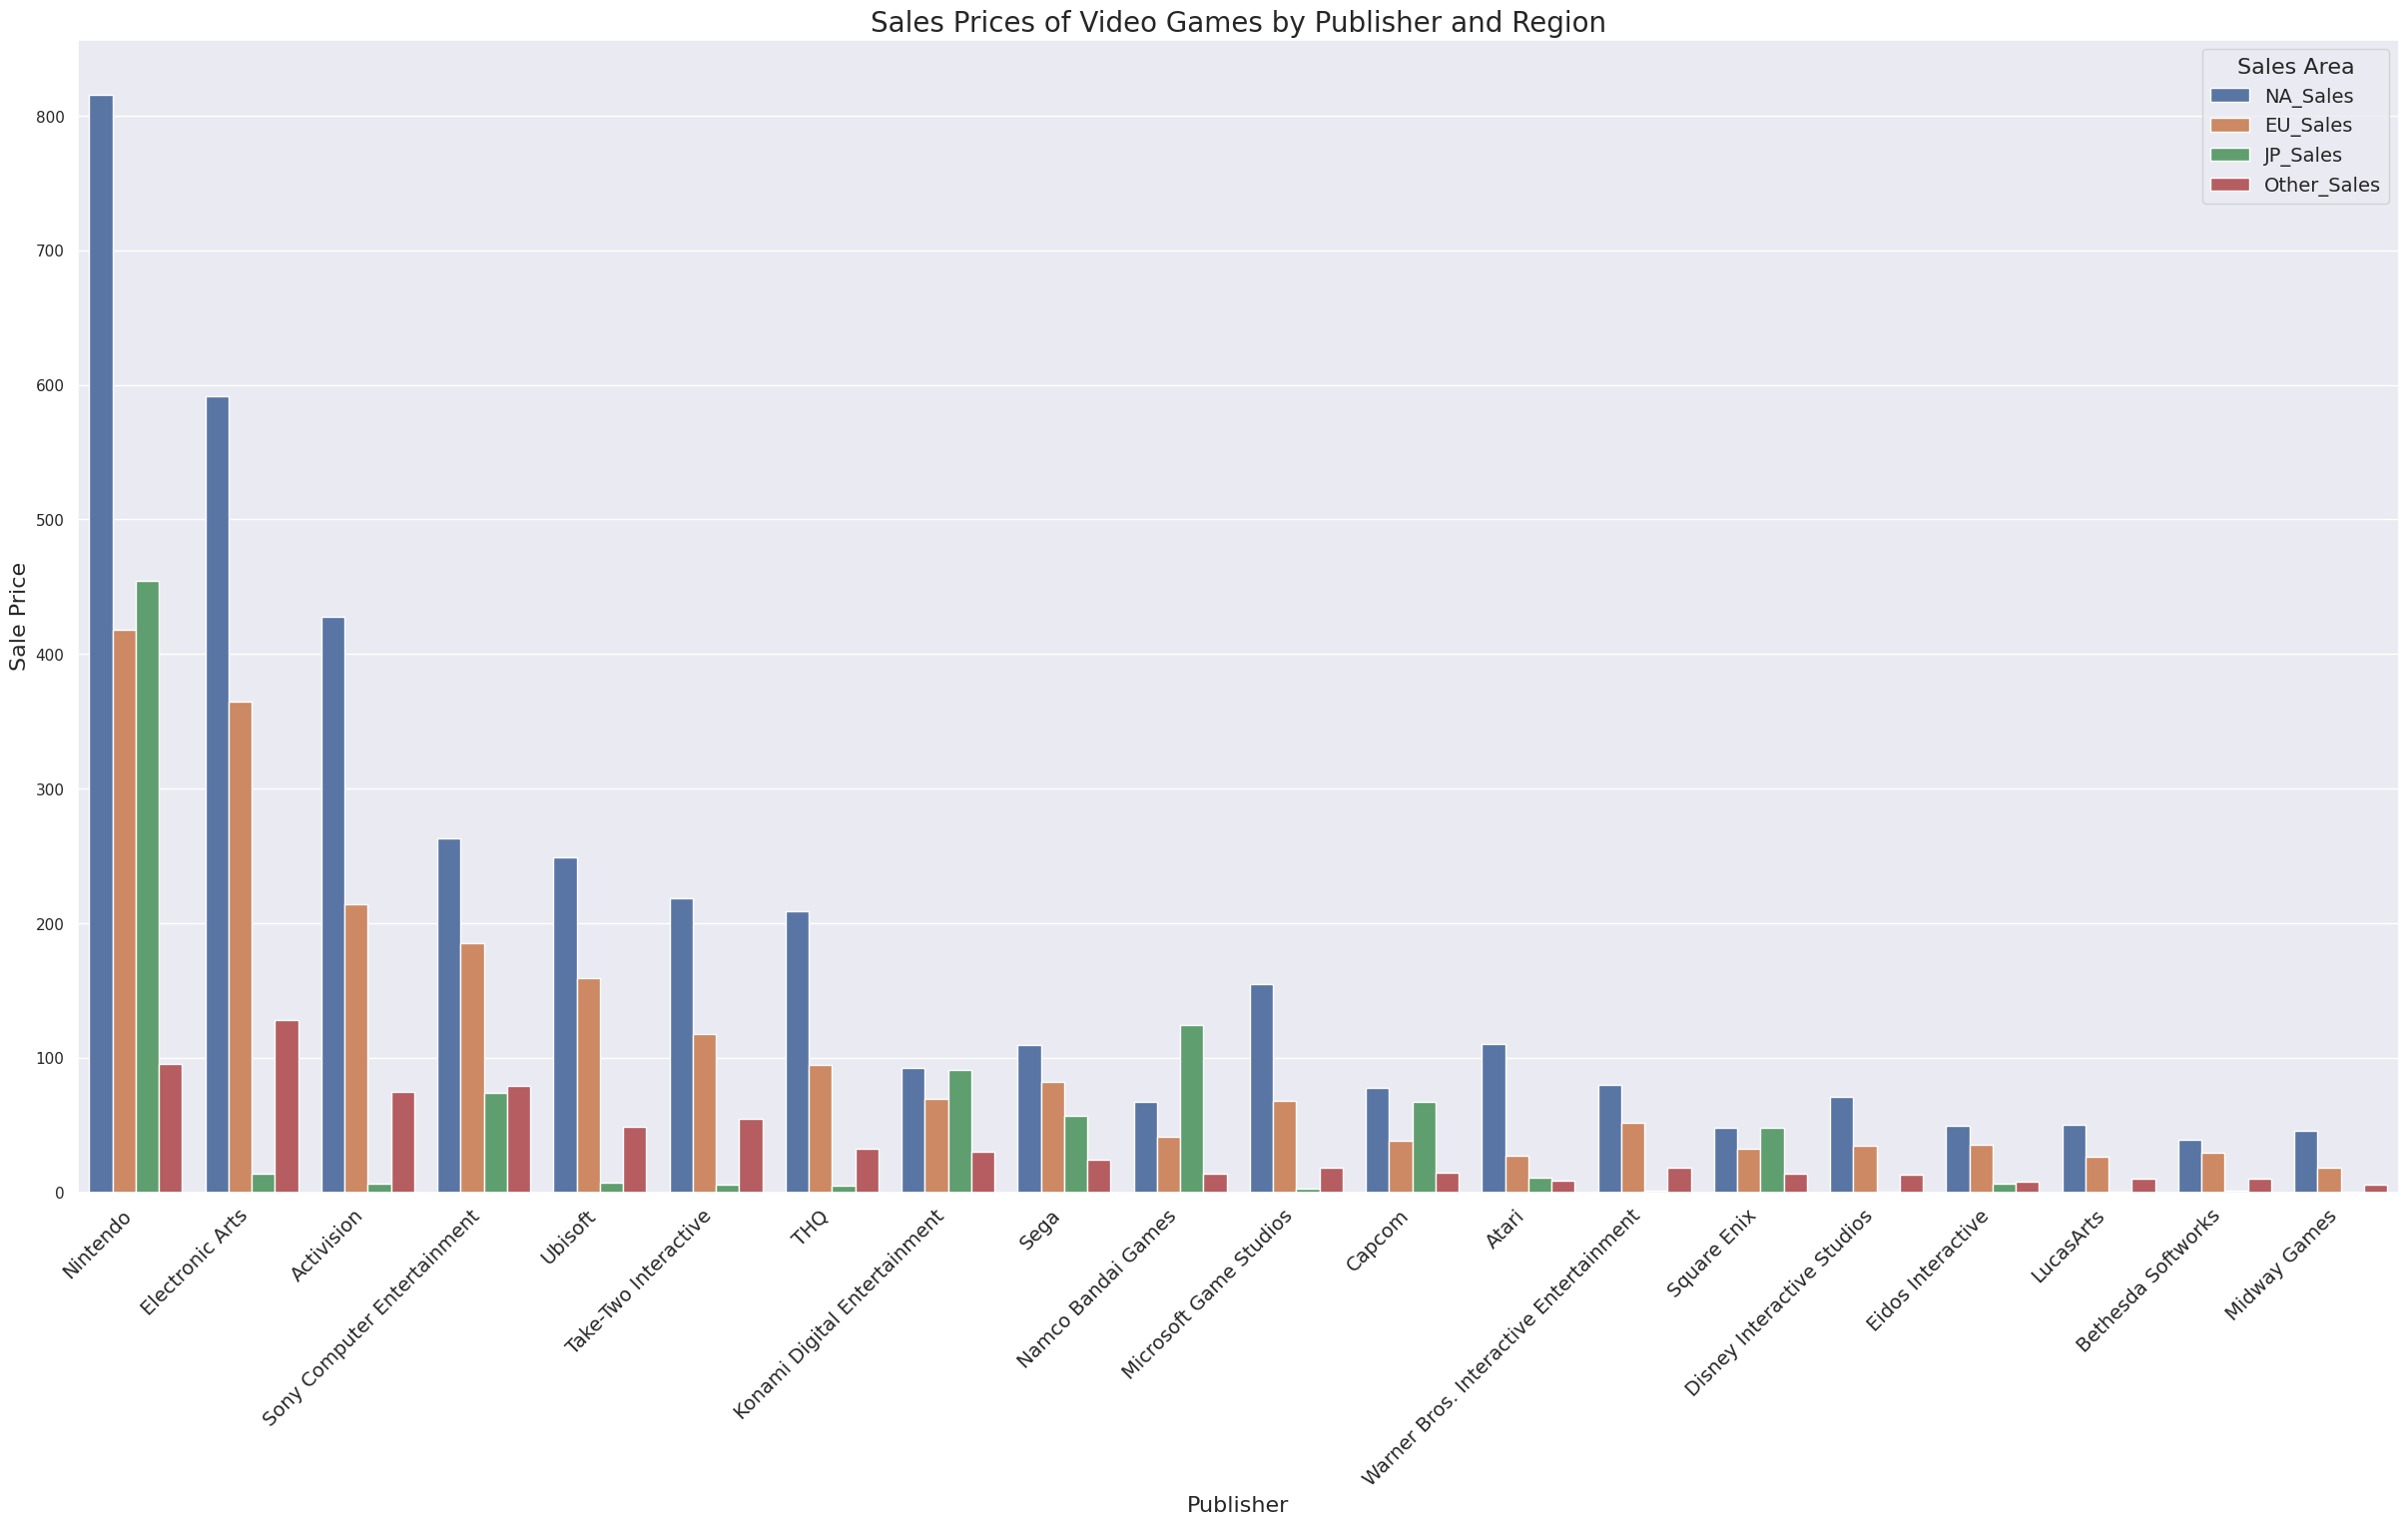

In [44]:
plt.figure(figsize=(30, 15))

# Create a bar plot to visualize sales prices of video games across different publishers and regions
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.xlabel('Publisher', fontsize=16)
plt.ylabel('Sale Price', fontsize=16)
plt.title('Sales Prices of Video Games by Publisher and Region', fontsize=20)
plt.legend(title='Sales Area', title_fontsize='16', fontsize='14')
plt.show()

# Determining the top publisher by Count each year

In [45]:
# Select the 'Year' and 'Publisher' columns and create a new DataFrame
top_publisher = data[['Year', 'Publisher']]

# Group the data by 'Year' and 'Publisher', then calculate the count of each group
# and reset the index to create a new DataFrame
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')

# Create a boolean Series to identify the rows where 'Count' is the maximum for each 'Year'
top_publisher_idx = top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']

# Filter the DataFrame to keep only the rows with the maximum 'Count' for each 'Year'
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)

# Drop duplicate rows based on 'Year' and 'Count', keeping the last occurrence
top_publisher_count = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)

# Print the resulting DataFrame
print(top_publisher_count)

      Year                     Publisher  Count
0   1980.0                    Activision      5
1   1981.0                         Atari     11
2   1982.0                         Atari     14
3   1983.0                      Nintendo      6
4   1984.0                      Nintendo      9
5   1985.0                      Nintendo      7
6   1986.0                      Nintendo      6
7   1987.0                      Nintendo      4
8   1988.0                      Nintendo      6
9   1989.0                      Nintendo      9
10  1990.0                      Nintendo      7
11  1991.0                      Nintendo     13
12  1992.0                      Nintendo     10
13  1993.0                      Nintendo      9
14  1994.0                          Sega     26
15  1995.0   Sony Computer Entertainment     31
16  1996.0   Sony Computer Entertainment     28
17  1997.0   Sony Computer Entertainment     34
18  1998.0   Sony Computer Entertainment     30
19  1999.0  Konami Digital Entertainment

/tmp/ipykernel_222/2549920549.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  top_publisher_idx = top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']


In [46]:
# Get the 'Publisher' column from the top_publisher_count DataFrame
publisher = top_publisher_count['Publisher']
publisher

0                       Activision
1                            Atari
2                            Atari
3                         Nintendo
4                         Nintendo
5                         Nintendo
6                         Nintendo
7                         Nintendo
8                         Nintendo
9                         Nintendo
10                        Nintendo
11                        Nintendo
12                        Nintendo
13                        Nintendo
14                            Sega
15     Sony Computer Entertainment
16     Sony Computer Entertainment
17     Sony Computer Entertainment
18     Sony Computer Entertainment
19    Konami Digital Entertainment
20     Sony Computer Entertainment
21                 Electronic Arts
22                 Electronic Arts
23                 Electronic Arts
24                 Electronic Arts
25                 Electronic Arts
26                 Electronic Arts
27                 Electronic Arts
28                 E

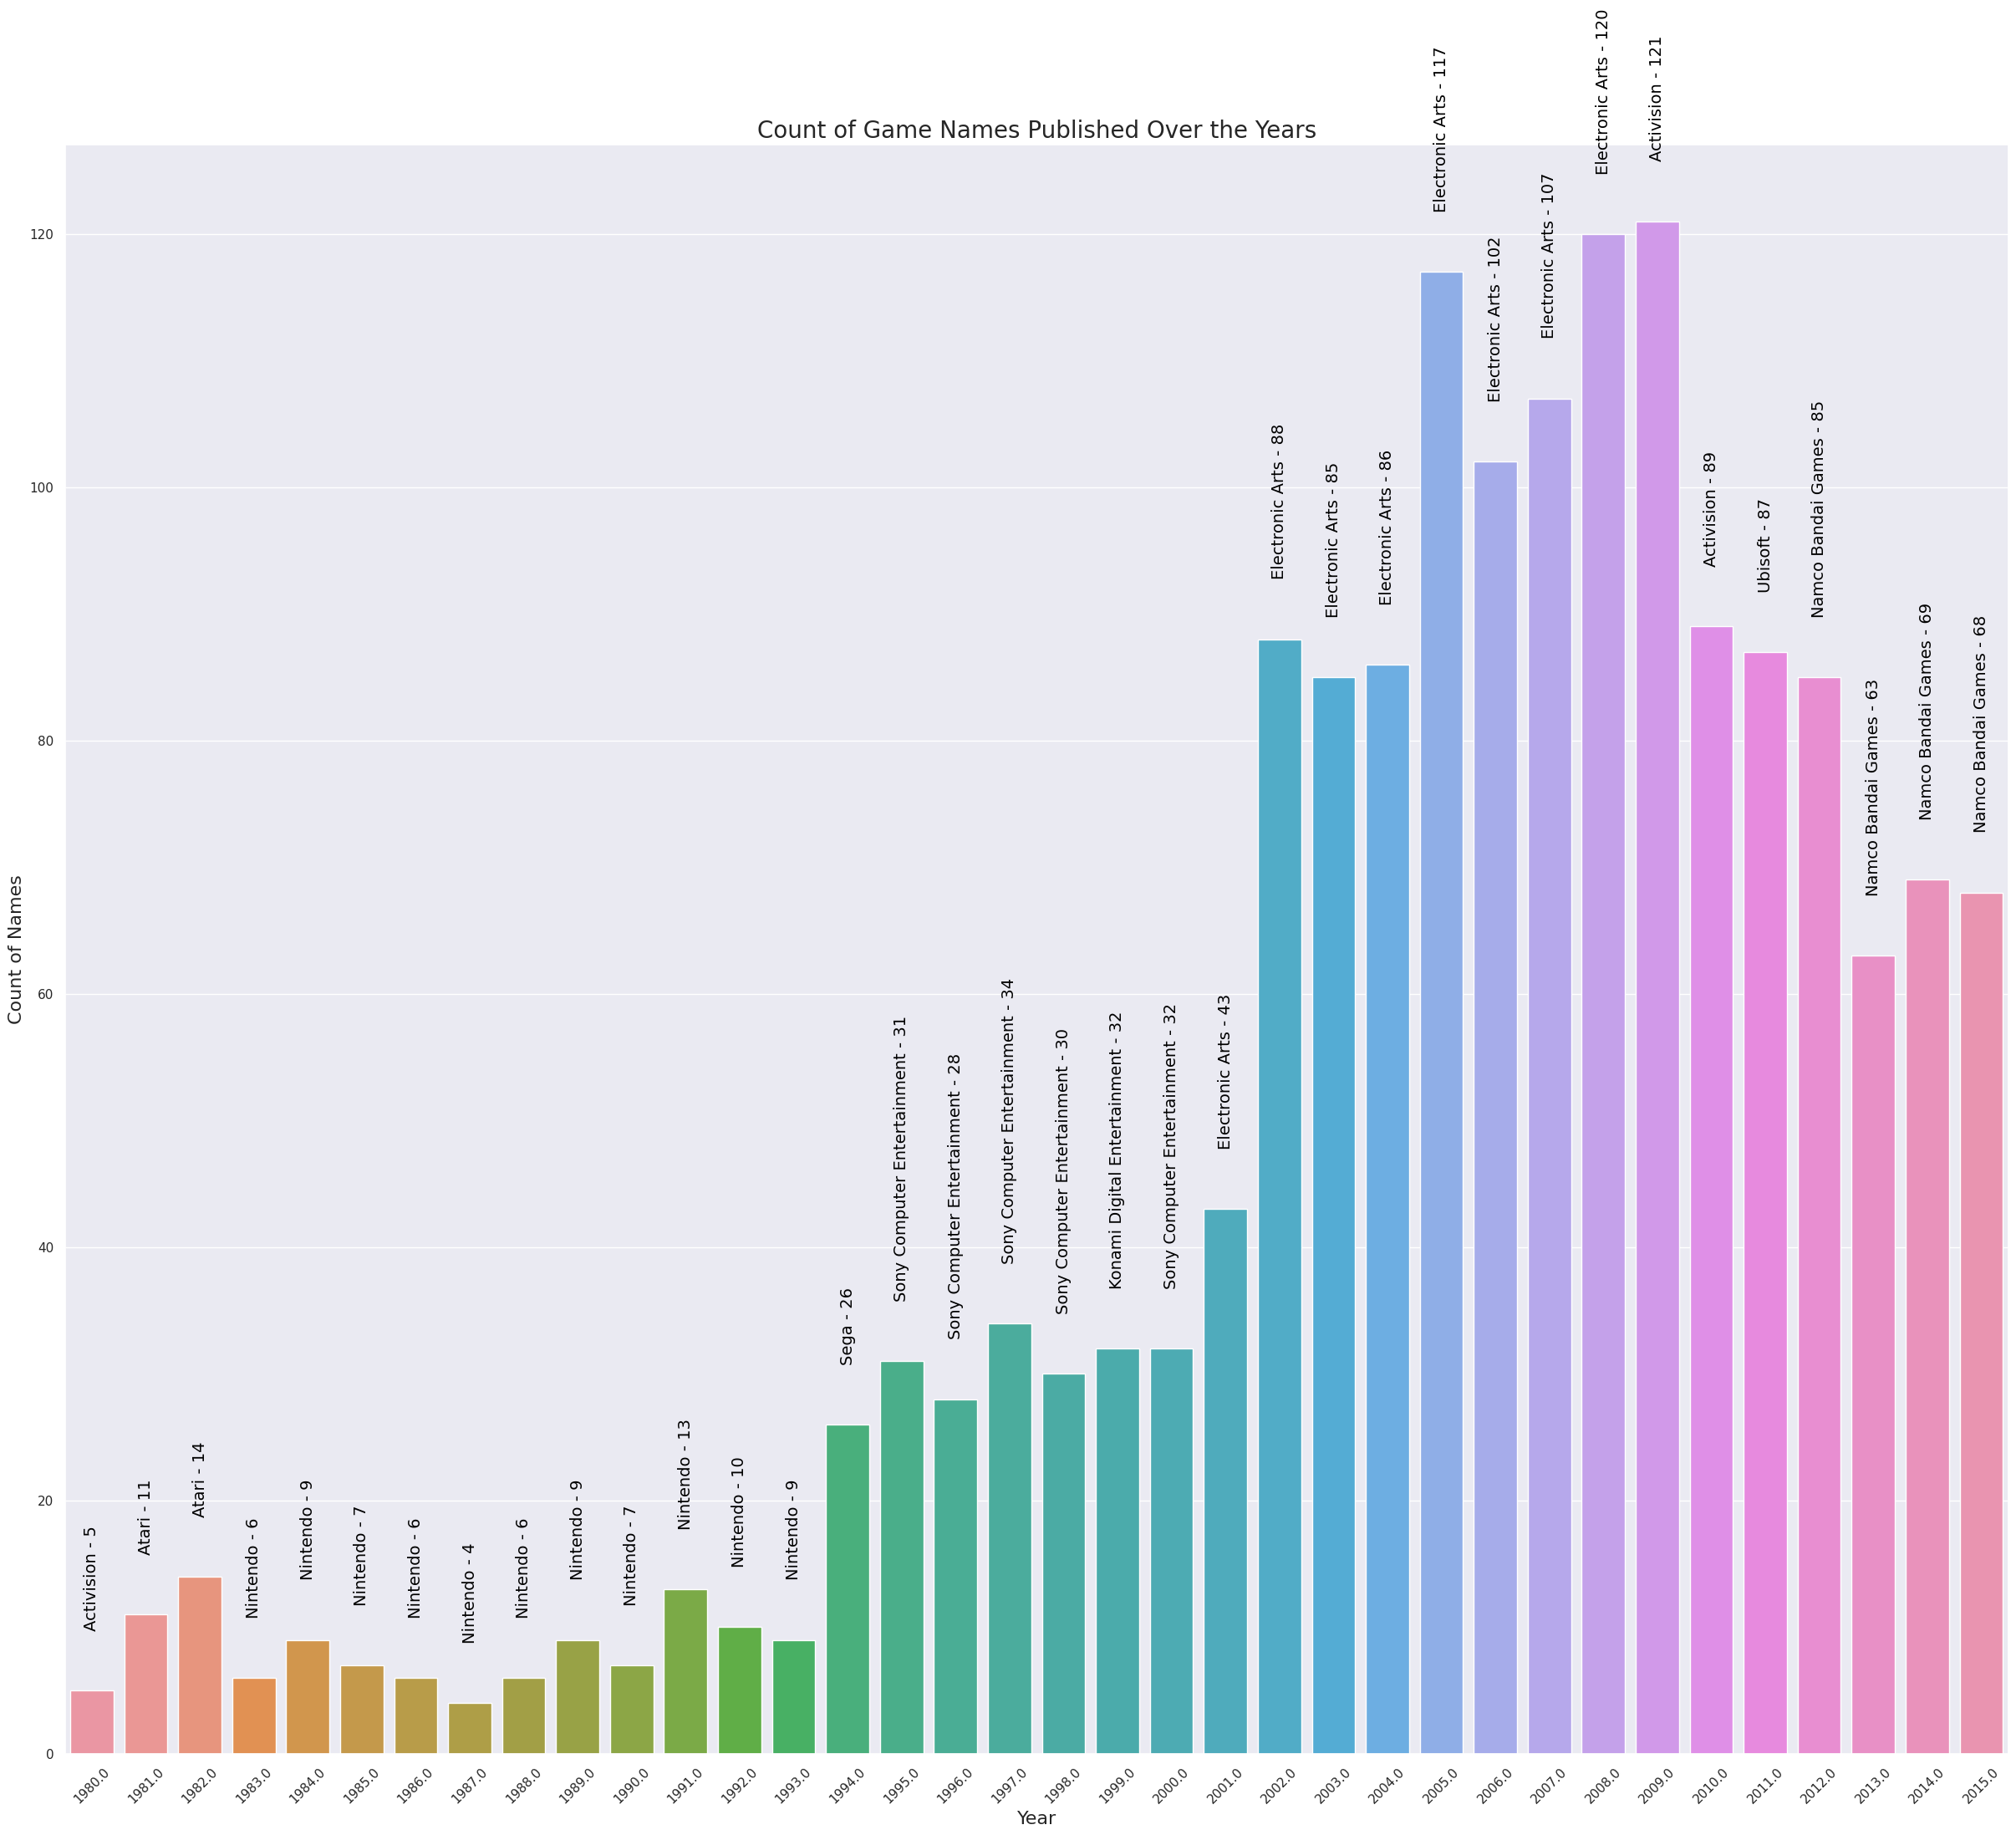

In [47]:
# Create a bar plot to visualize the count of game names published over the years, with annotations
plt.figure(figsize=(30, 25))
bar_plot = sns.barplot(x='Year', y='Count', data=top_publisher_count)

# Iterate over the rows of the DataFrame to add labels above each bar
index = 0
for value in top_publisher_count['Count'].values:
    bar_plot.text(index, value + 5, f"{publisher[index]} - {value}", color='#000', size=14, rotation=90, ha="center")
    index += 1
plt.xticks(rotation=45)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count of Names', fontsize=16)
plt.title('Count of Game Names Published Over the Years', fontsize=20)
plt.show()

# Analyzing total revenue across different regions.

In [48]:
# Select columns containing regional sales data (NA_Sales, EU_Sales, JP_Sales, Other_Sales)
# Calculate the sum of sales for each region
# Reset the index and rename the columns for clarity
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

region     sale
0     NA_Sales  4370.02
1     EU_Sales  2407.37
2     JP_Sales  1277.27
3  Other_Sales   789.98

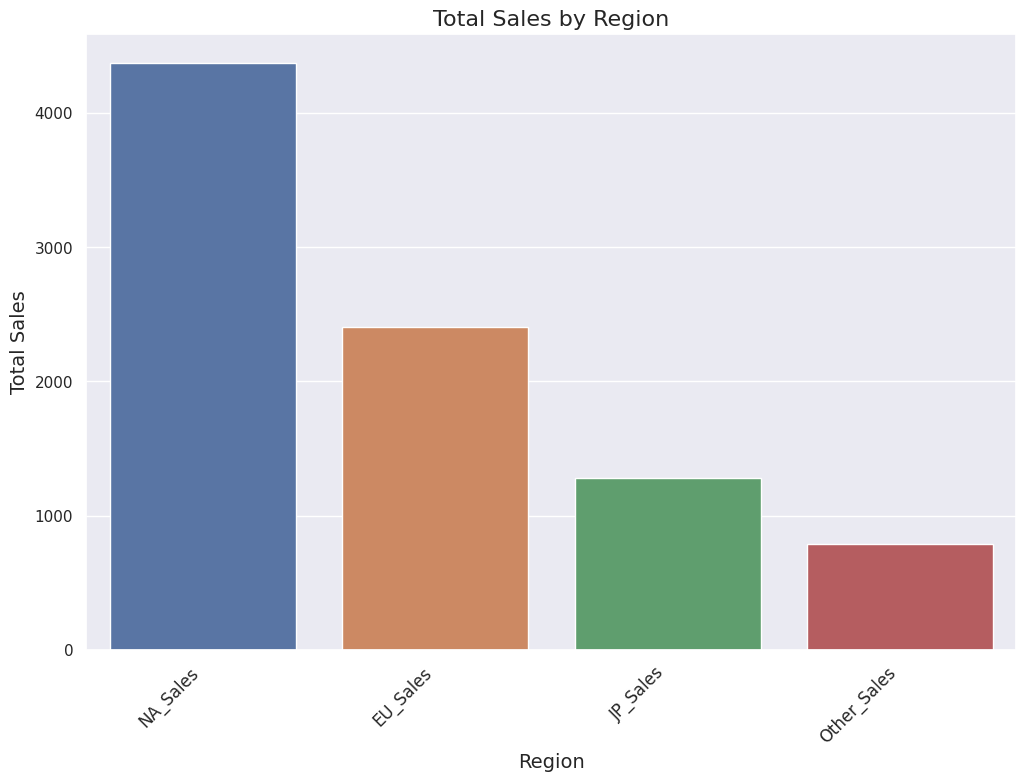

In [49]:
plt.figure(figsize=(12, 8))

# Create a bar plot to visualize the total sales for each region
sns.barplot(x='region', y='sale', data=top_sale_reg)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Total Sales by Region', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [50]:
# Extract labels and sizes from the DataFrame
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

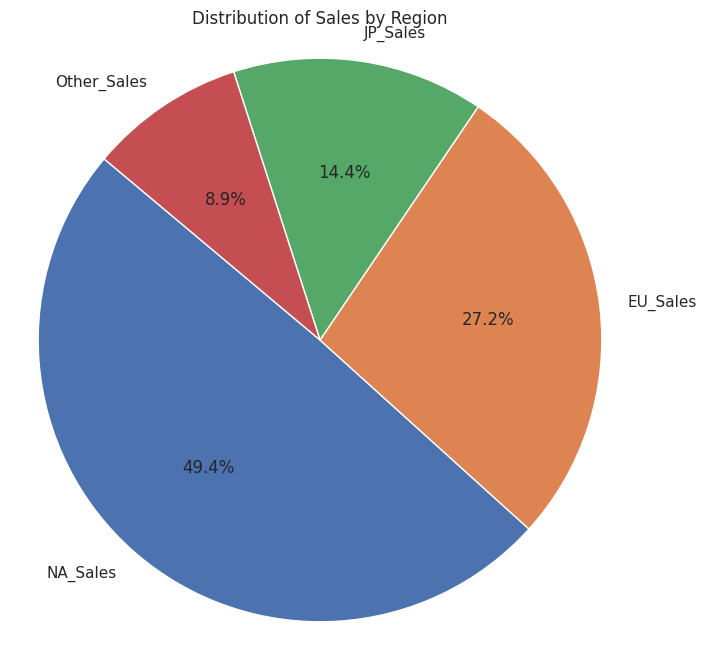

In [51]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Visualizing the distribution of sales using histograms.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

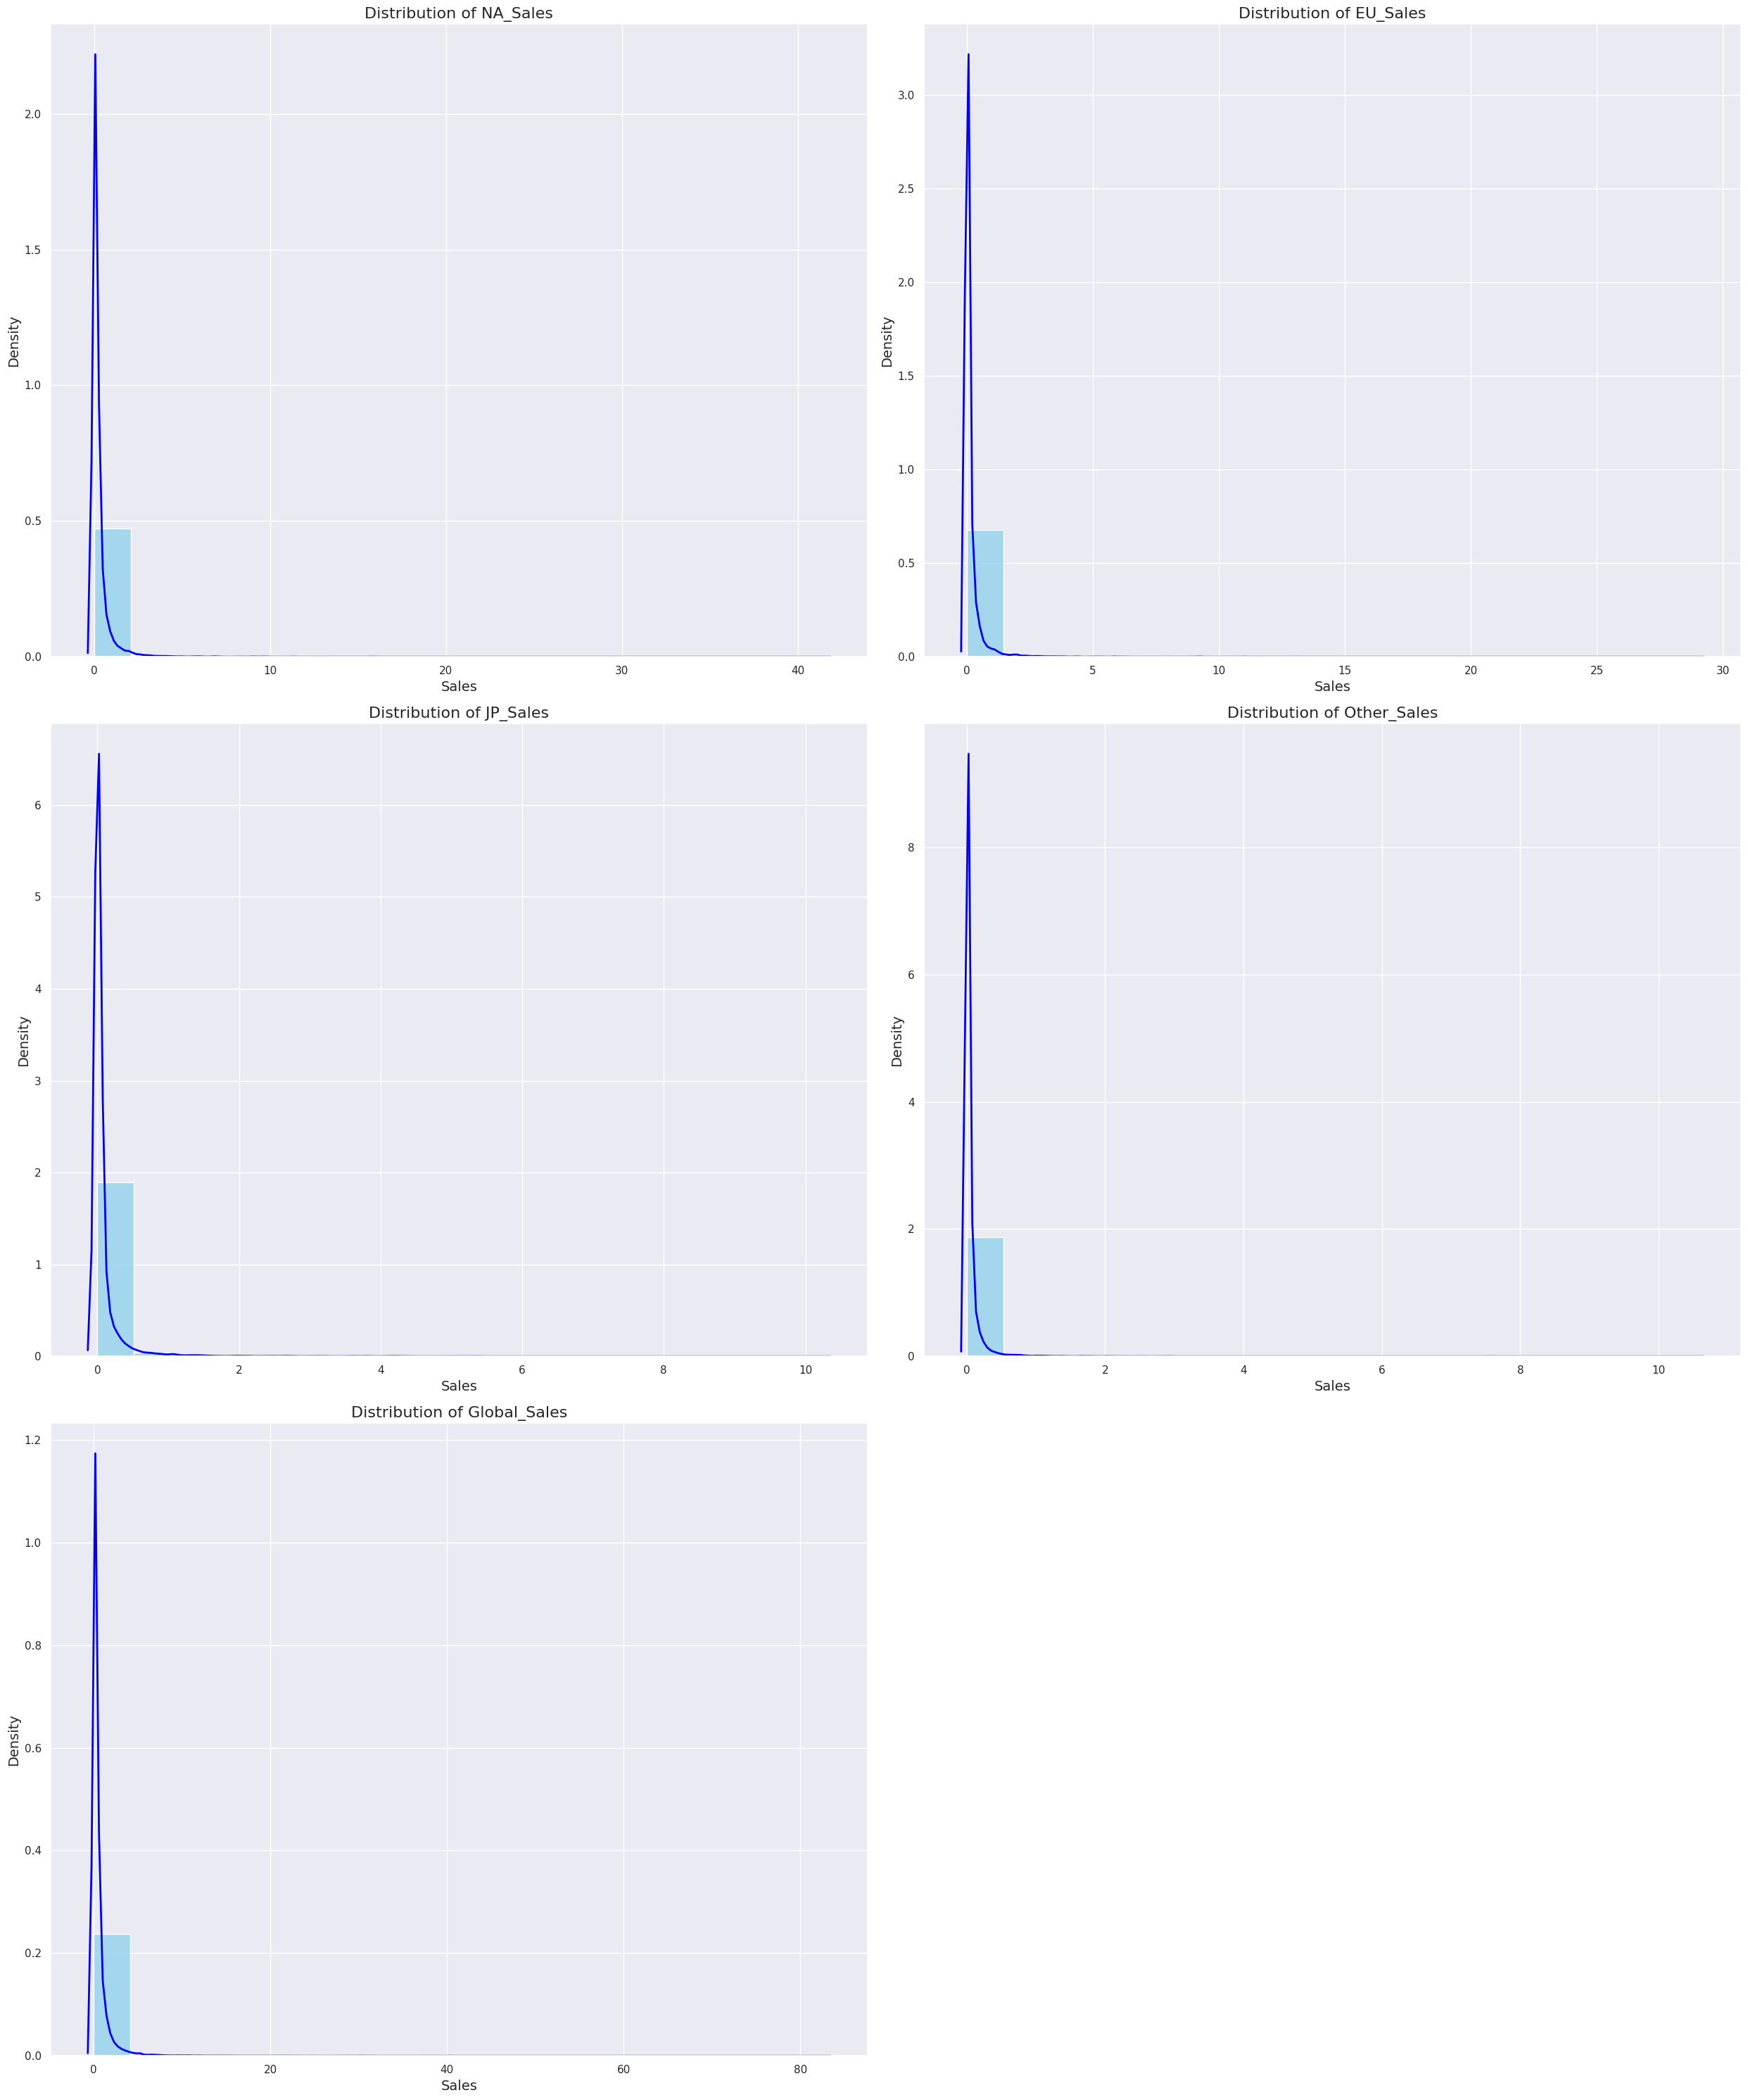

In [52]:
plt.figure(figsize=(25, 30))

# Define sales columns
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Loop over each sales column and create a subplot
for i, column in enumerate(sales_columns):
    plt.subplot(3, 2, i+1)
    
    # Plot histogram with a gamma distribution fit
    sns.histplot(data[column], bins=20, kde=False, stat='density', color='skyblue', alpha=0.7)
    sns.kdeplot(data[column], color='blue', linewidth=2)
    
    # Add labels for the x and y axes
    plt.xlabel('Sales', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    
    # Set title for each subplot
    plt.title(f'Distribution of {column}', fontsize=16)
    
    # Add grid lines for better readability
    plt.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

In [53]:
data_hist_log = data.copy()

In [54]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

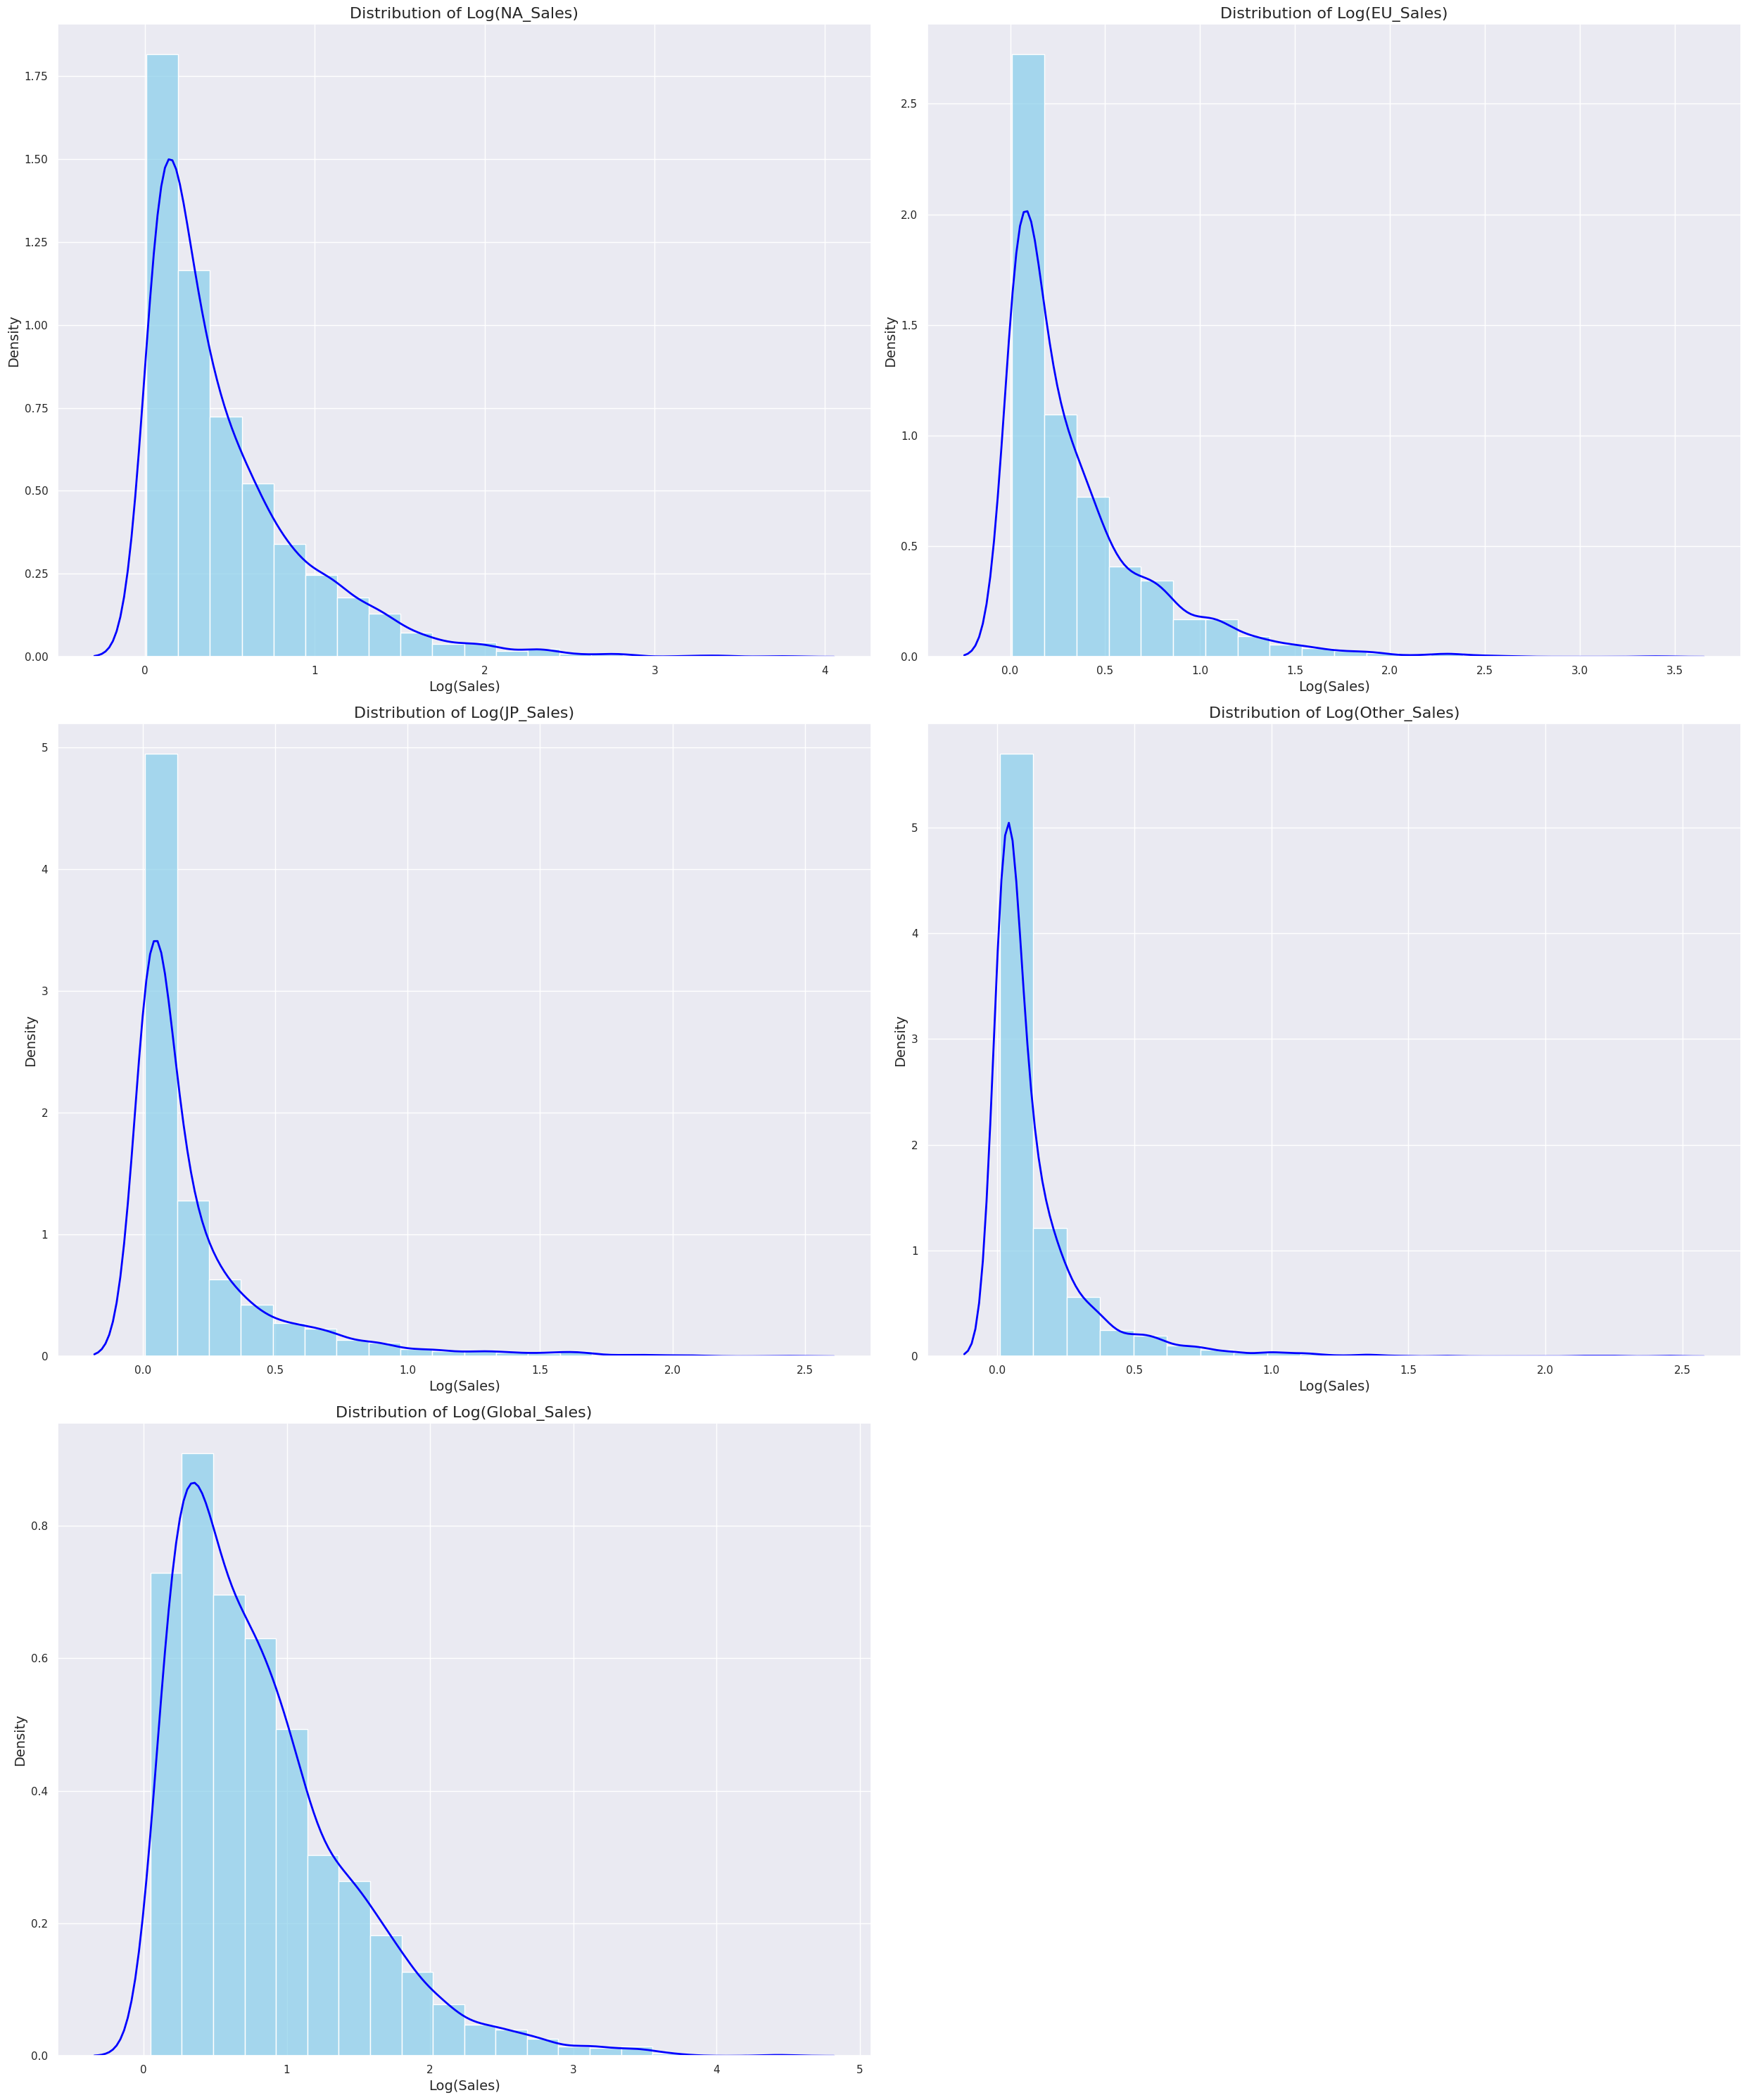

In [55]:
plt.figure(figsize=(25, 30))

# Define sales columns
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Loop over each sales column and create a subplot
for i, column in enumerate(sales_columns):
    plt.subplot(3, 2, i+1)
    log_data = np.log(data_hist_log[column] + 1)
    sns.histplot(log_data, bins=20, kde=False, stat='density', color='skyblue', alpha=0.7)
    sns.kdeplot(log_data, color='blue', linewidth=2)
    plt.xlabel('Log(Sales)', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    
    # Set title for each subplot
    plt.title(f'Distribution of Log({column})', fontsize=16)
    plt.grid(True)
plt.tight_layout()

plt.show()

# Analyzing relationships between columns using correlation matrix.

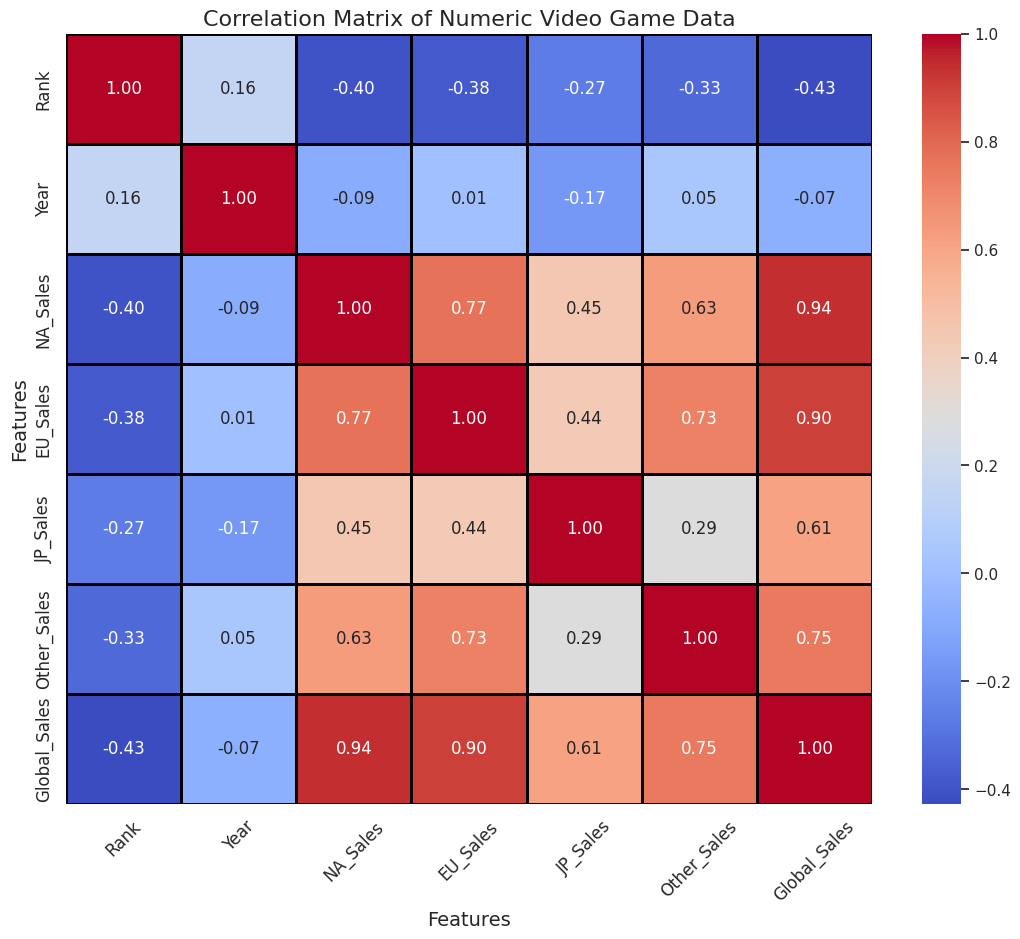

In [56]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(13, 10))

# Create heatmap with improved parameters
heatmap = sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=1, linecolor='black')
plt.title('Correlation Matrix of Numeric Video Game Data', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)
plt.show()

# Creating pair plots to visualize relationships between different variables.

In [57]:
# Selecting a subset of columns from the original DataFrame data
# These columns include 'Year', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', and 'Other_Sales'
data_pair = data.loc[:, ["Year", "Platform", "Genre", "NA_Sales", "EU_Sales", "Other_Sales"]]
# Display the new DataFrame data_pair
data_pair

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006.0      Wii        Sports     41.49     29.02         8.46
1      1985.0      NES      Platform     29.08      3.58         0.77
2      2008.0      Wii        Racing     15.85     12.88         3.31
3      2009.0      Wii        Sports     15.75     11.01         2.96
4      1996.0       GB  Role-Playing     11.27      8.89         1.00
...       ...      ...           ...       ...       ...          ...
16593  2002.0      GBA      Platform      0.01      0.00         0.00
16594  2003.0       GC       Shooter      0.01      0.00         0.00
16595  2008.0      PS2        Racing      0.00      0.00         0.00
16596  2010.0       DS        Puzzle      0.00      0.01         0.00
16597  2003.0      GBA      Platform      0.01      0.00         0.00

[16250 rows x 6 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

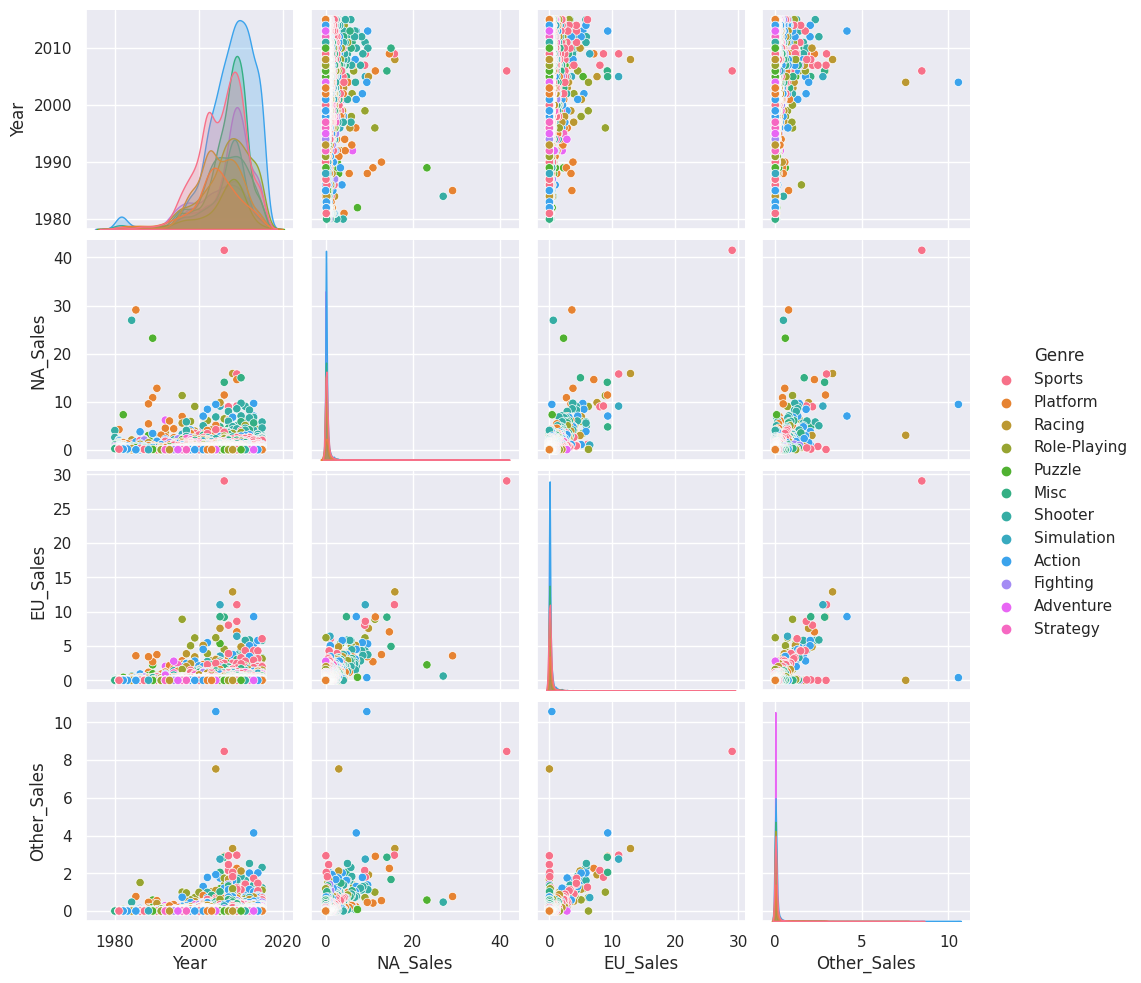

In [58]:
# Create a pairwise scatterplot matrix with hue set to 'Genre' for color differentiation
# This allows visualization of relationships between numerical features while considering the 'Genre' variable
sns.pairplot(data_pair, hue='Genre')

# Display the plot
plt.show()

# Applying logarithmic transformation to certain columns for data normalization.

In [59]:
# Create a copy of the original DataFrame data_pair
data_pair_log = data_pair.copy()

In [60]:
# Define sales columns
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [61]:
# Filter out rows where sales values are equal to zero to avoid issues with log transformation
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]
data_pair_log

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006.0      Wii        Sports     41.49     29.02         8.46
1      1985.0      NES      Platform     29.08      3.58         0.77
2      2008.0      Wii        Racing     15.85     12.88         3.31
3      2009.0      Wii        Sports     15.75     11.01         2.96
4      1996.0       GB  Role-Playing     11.27      8.89         1.00
...       ...      ...           ...       ...       ...          ...
14071  1998.0       PC  Role-Playing      0.01      0.02         0.01
14183  2014.0      PS3        Racing      0.02      0.01         0.01
14185  2011.0       PC        Puzzle      0.01      0.02         0.01
14267  2007.0       PC        Puzzle      0.01      0.02         0.01
14299  2009.0       PC      Strategy      0.01      0.02         0.01

[7893 rows x 6 columns]

In [62]:
# Apply log transformation to the sales columns
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales'])
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales'])
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

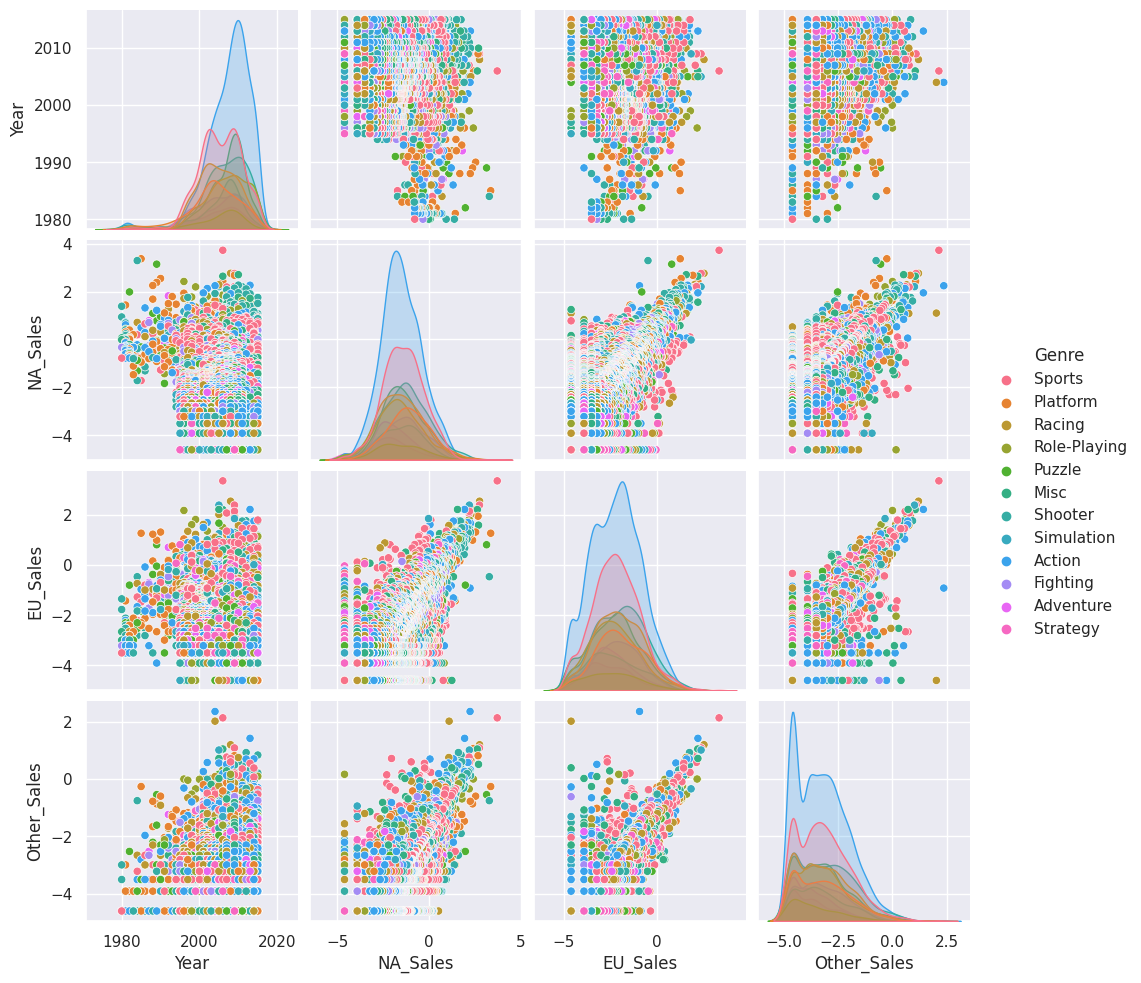

In [63]:
# Create a pairwise scatterplot matrix with hue set to 'Genre' for color differentiation
# Use 'palette="husl"' to specify the color palette
sns.pairplot(data_pair_log, hue='Genre', palette="husl")